# `Common (PDF) Distributions with plotting and Brief Explanation`

# <font color=red>Mr Fugu Data Science</font>

# (◕‿◕✿)

# `Purpose & Outcome:`

+ Show Common Distributions and how to plot them using R

+ Show their relative PDF formulas and brief explanations

**Suggested Book:** `Statistics: An Introduction using R, by Michael J. Crawley`


# `If you want to see a specific topic let me know!`

In [1]:
library(dplyr)
library(ggplot2)
library(tidyverse)
library(reshape2)
library(tidyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.1     ✔ purrr   0.3.4
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [20]:
# obtain same plots for this given random seed
set.seed(65432)

#increase plot size: IMPORTANT
options(repr.plot.width=14.5, repr.plot.height=8)

# `Binomial:` 

`discrete`

`--------------`

`PDF`

<font size=6>$f(x) = {{n}\choose{k}} p^x (1-x)^{(n-x)}$</font><font size=4>, where x=1,2,3,... n</font>

+ `Discrete Probability Function`: describes (n) independent trials. 
    + Each `trial` has an outcome of (T/F), (success/failure)

+ `If you have (n) trials, with (p) as the successful trials then (x) will be probability of successful trials.`

<font size=4>`Mean` np</font>

<font size=4>`Standard Deviation` $\sqrt{np(1-p)}$</font>


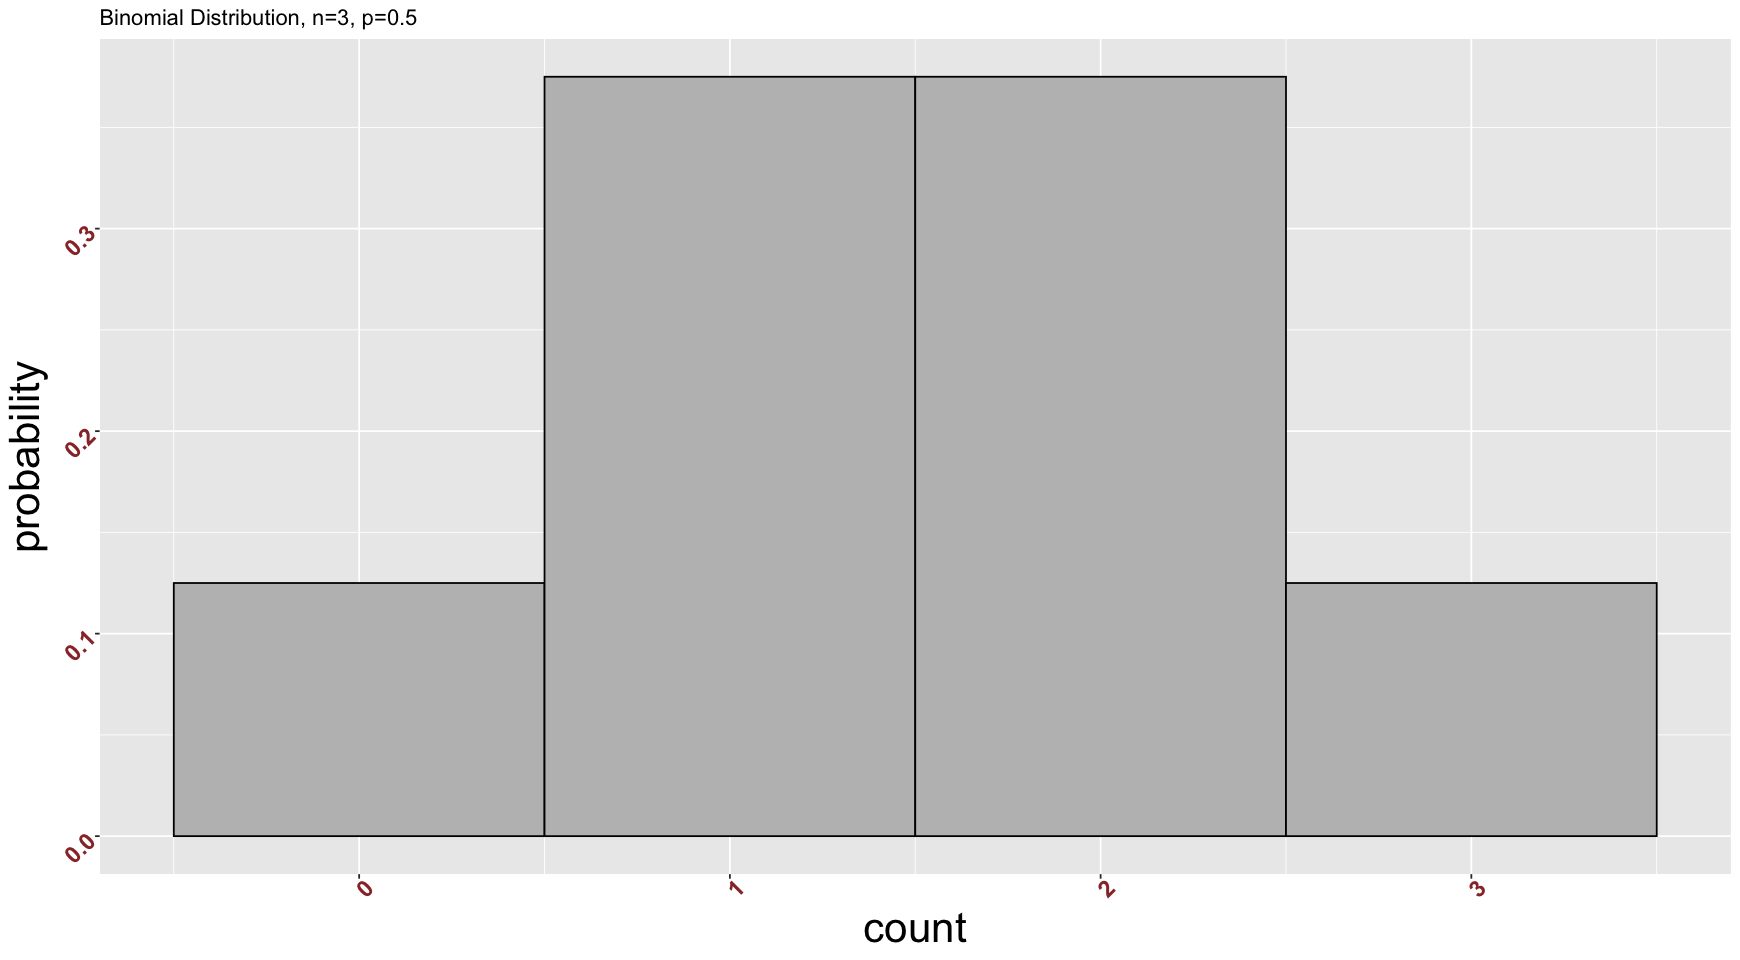

In [21]:
dat<-data.frame(count=0:3,probability=dbinom(0:3,3,.5))
g<-ggplot(dat,aes(x=count,y=probability))+geom_col(width=1,fill="gray",color="black")
g<-g+labs(title="Binomial Distribution, n=3, p=0.5")

g<-g + theme(axis.title.y = element_text(size = rel(2.3), angle = 90))
g<-g + theme(axis.title.x = element_text(size = rel(2.3), angle = 00))

g<-g + theme(axis.text.x = element_text(face="bold", color="#993333", 
                           size=14, angle=45),
          axis.text.y = element_text(face="bold", color="#993333", 
                           size=14, angle=45))
g

# `Show the progression as samples increase with p=0.5`

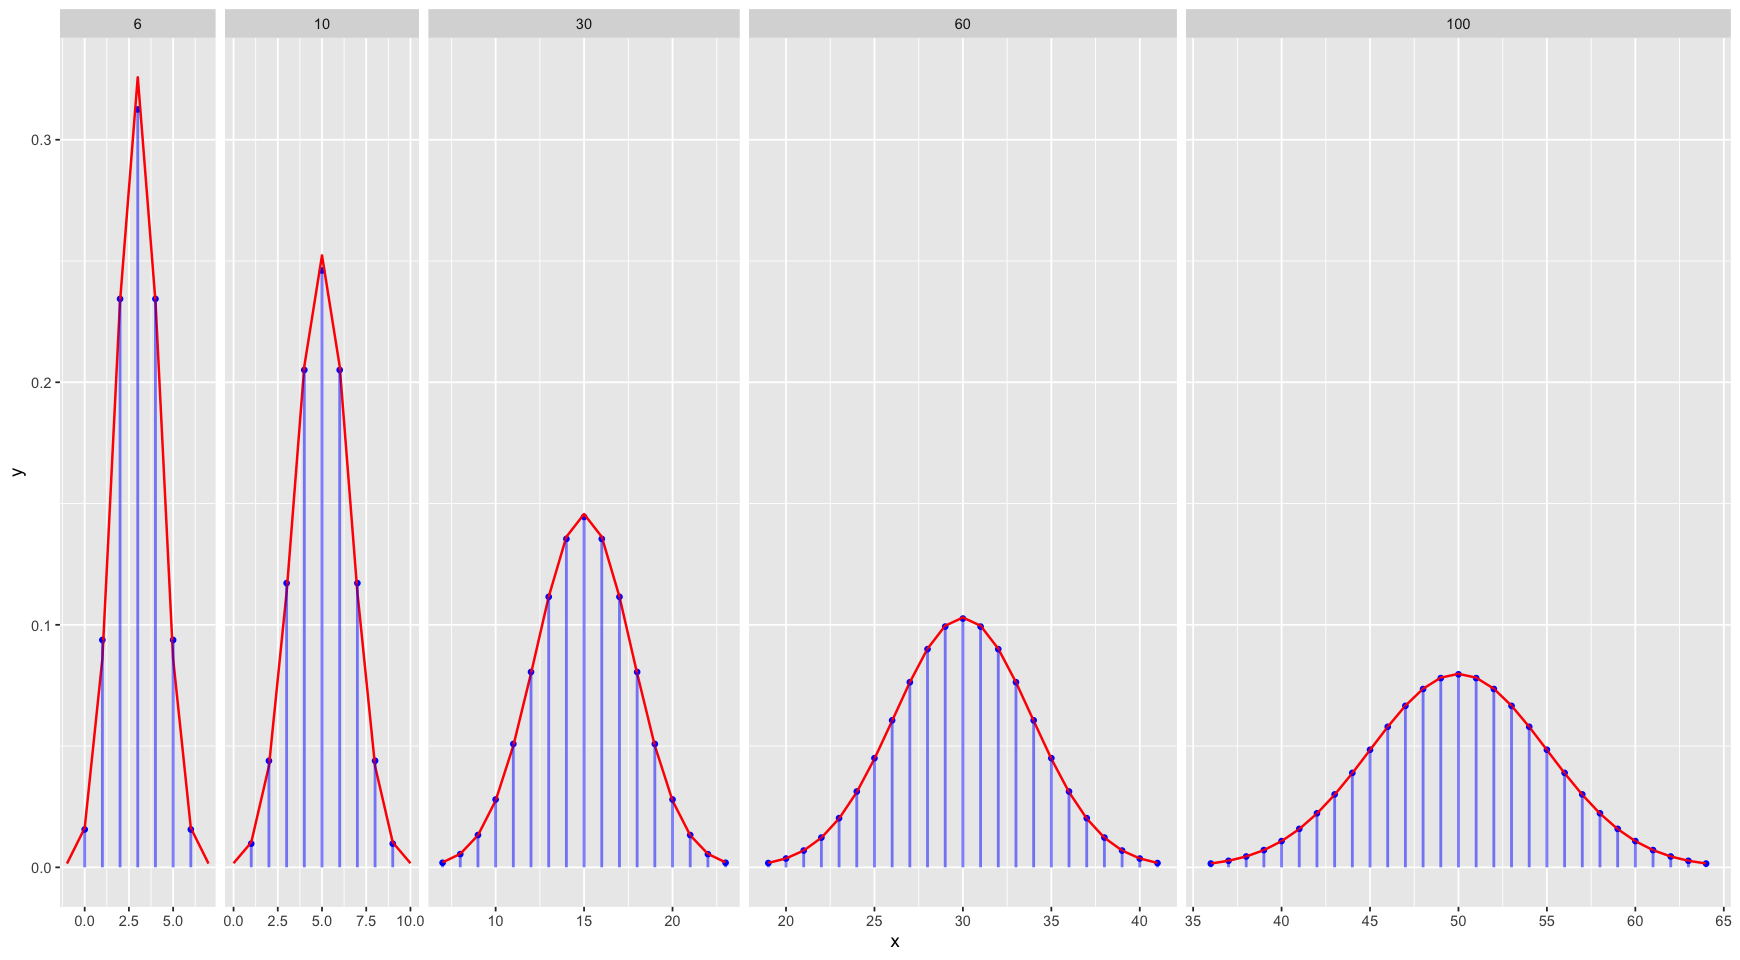

In [22]:
x <- -5:250
n = c(6,10,30,60,100)
p = 0.5
ymin = 1e-3
normal=data.frame(x=rep(x, length(n)),
                  y=dnorm(x, rep(n,each=length(x))*p,
                (rep(n, each=length(x))*p*(1-p))^0.5),
                  n=rep(n, each=length(x)))
binom = data.frame(x=rep(x, length(n)), 
                   y=dbinom(x, rep(n, each=length(x)), p),
                   n=rep(n, each=length(x)))

ggplot(binom %>% filter(y > ymin), aes(x, y)) +
  geom_point(size=1.2, colour="blue") +
  geom_line(data=normal %>% filter(y > ymin), lwd=0.7, colour="red") +
  geom_segment(aes(x=x, xend=x, y=0, yend=y), lwd=0.8, alpha=0.5, colour="blue") +
  facet_grid(. ~ n, scales="free", space="free")

# citation for link

# `Poisson:` 

`discrete distribution`

`--------------`

`PDF`

<font size=6>$f(x) = \frac{\lambda^x e^{-\lambda}}{x!}$</font>

+ `Probability Distribution`: of independent events **(x)**, for some expected number of events for a time interval **($\lambda$)**.

`--------------`

**Examples of use cases:** `stock market changes, radioactive decay, transportation related to arrivals for example.`

<font size=5>`Mean` $\lambda$</font>

<font size=5>`Standard Deviation` $\sqrt\lambda$</font>

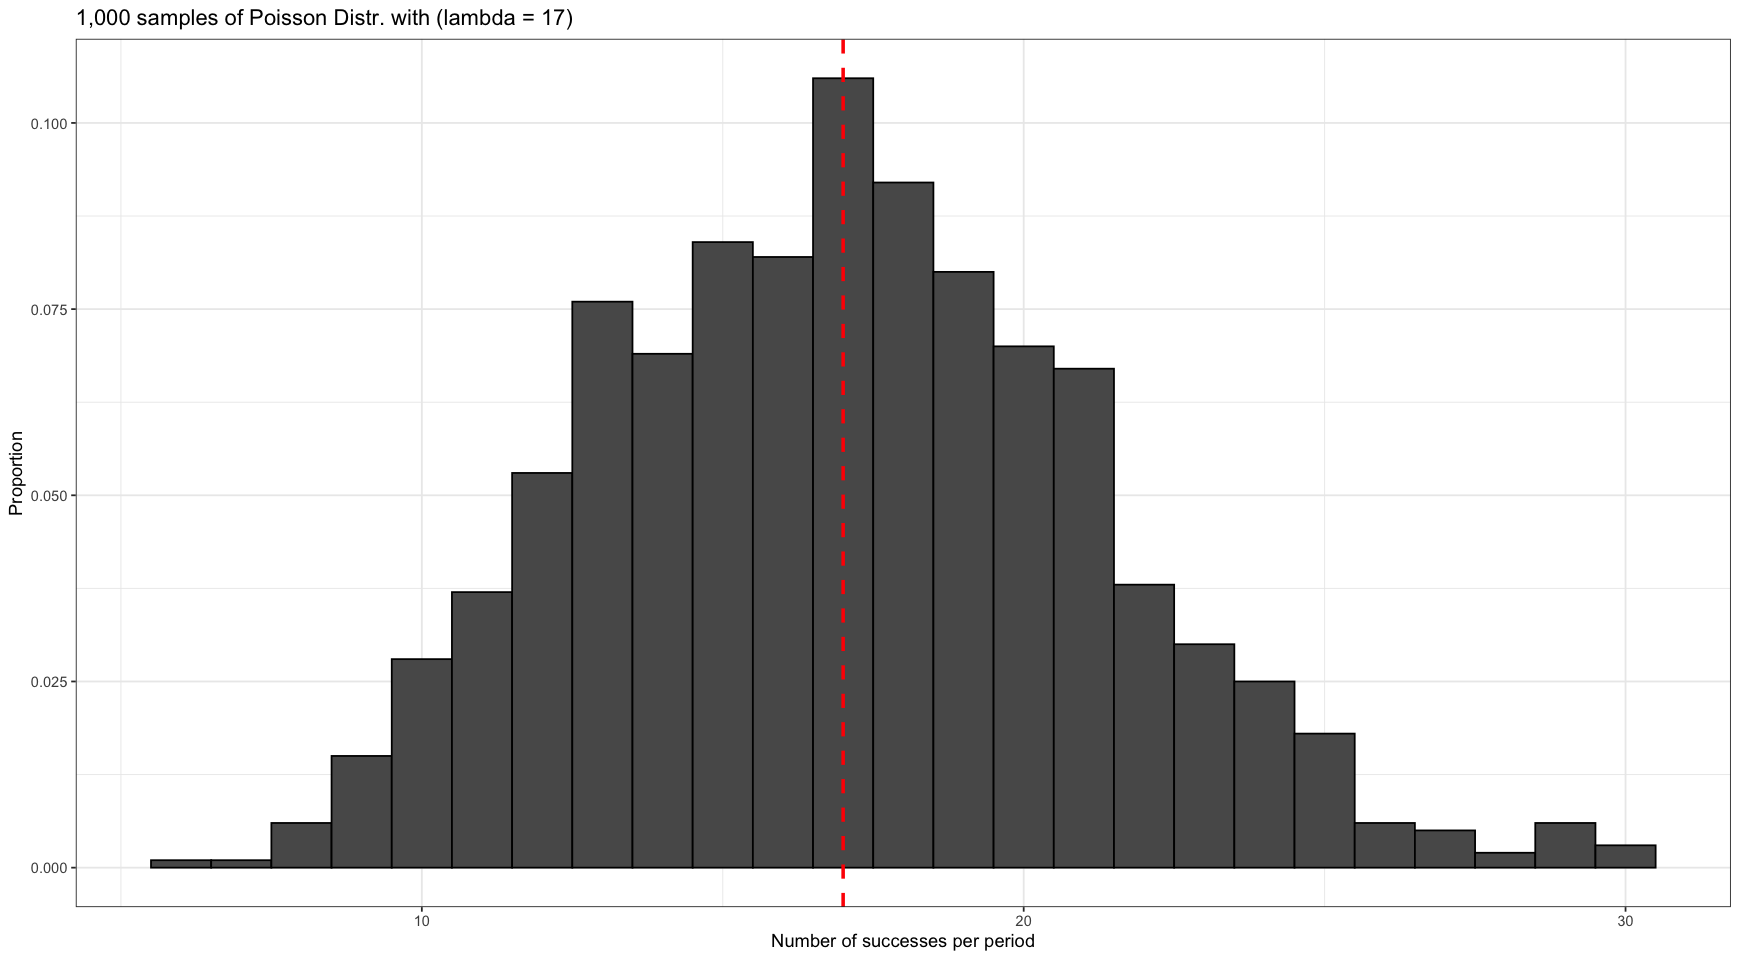

In [23]:
poisson_data <- data.frame('data' = rpois(1000, 17))

poisson_data %>% ggplot() + 
  geom_histogram(aes(x = data, 
                     y = stat(count / sum(count))), 
                     color = 'black',
                 binwidth = 1) +
  geom_vline(xintercept = 17, 
             size = 1, 
             linetype = 'dashed',
             color = 'red') +
  theme_bw() +
  labs(x = 'Number of successes per period',
       y = 'Proportion',
       title = '1,000 samples of Poisson Distr. with (lambda = 17)')

#citation below

# `Notice the trend with` $\lambda$:

this will be your $\mu$ and as you increase the number it will start going from a right skewed toward a normal distribution 

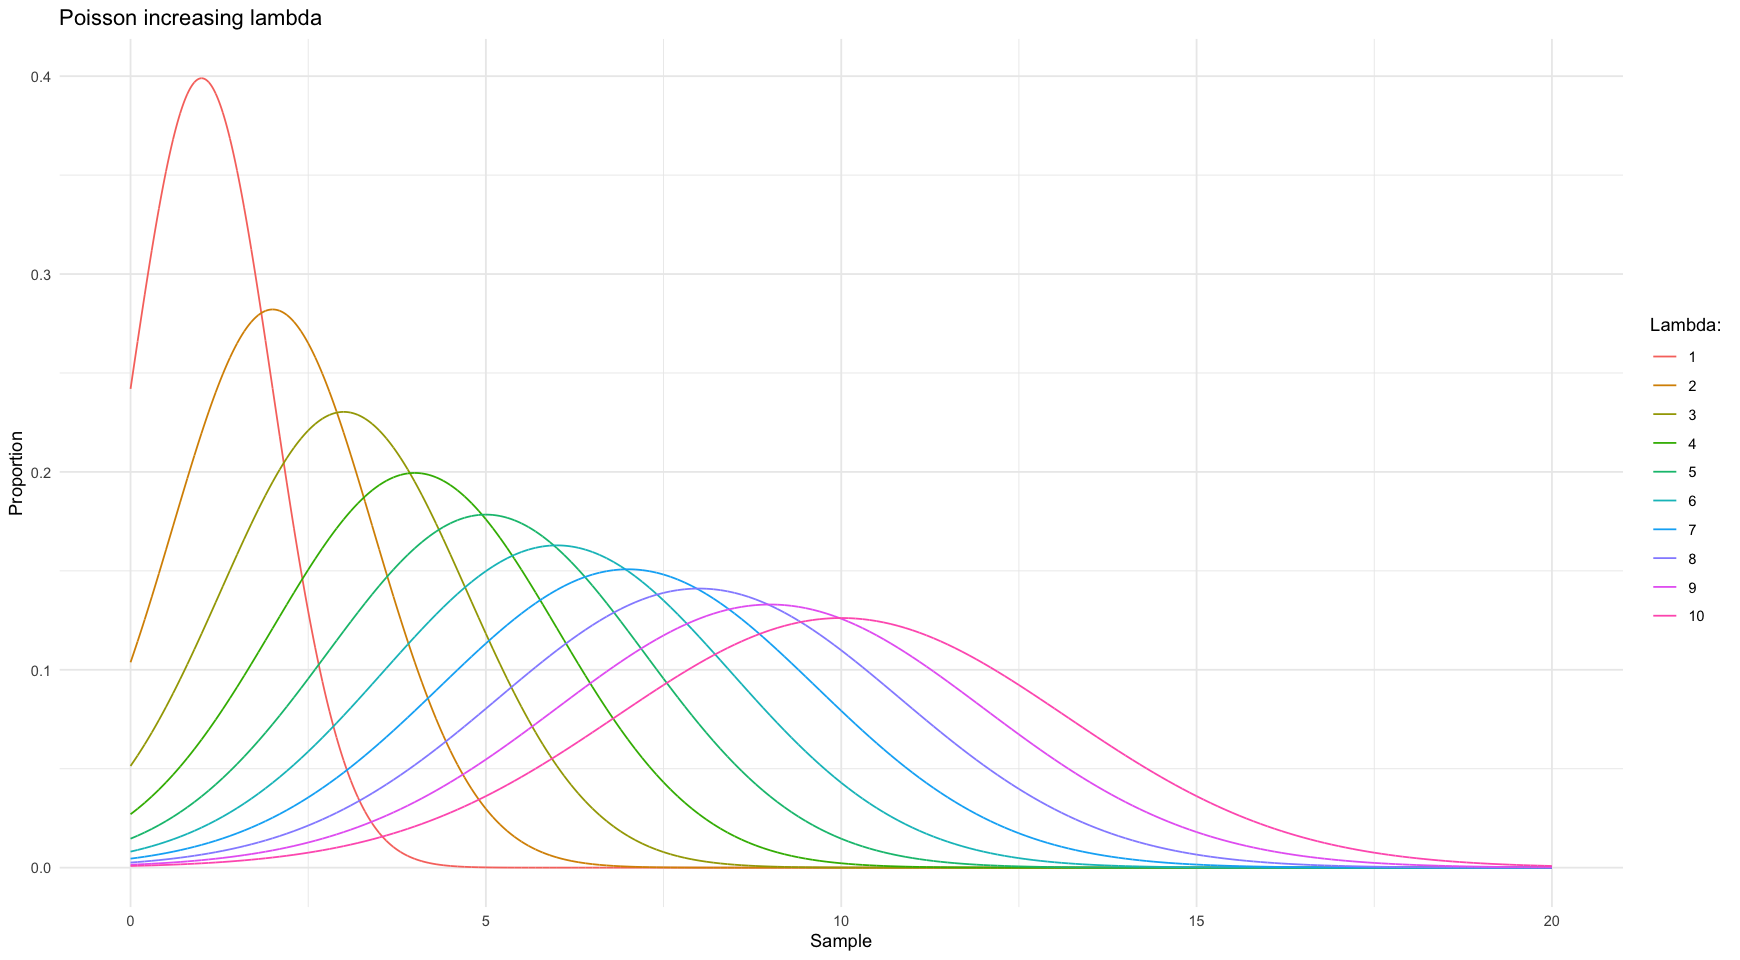

In [24]:
# Build Poisson distributions

p_dat <- map_df(1:10, ~ tibble(
  l = paste(.),
  x = 0:20,
  y = dpois(0:20, .)
))

# Build Normal distributions

n_dat <- map_df(1:10, ~ tibble(
  l = paste(.),
  x = seq(0, 20, by = 0.001),
  y = dnorm(seq(0, 20, by = 0.001), ., sqrt(.))
))

# Use ggplot2 to plot

ggplot(n_dat, aes(x, y, color = factor(l, levels = 1:10))) +
  geom_line() +
  labs(color = "Lambda:",x = 'Sample',
       y = 'Proportion',
       title = 'Poisson increasing lambda') +
  theme_minimal()

#citation below

# `Weibull:` 

`continuous`

`-------------`

`PDF`

<font size=6>$f(T) = \frac{\alpha}{\beta} (\frac{x}{\beta})^{\alpha -1} e^{(-\frac{x}{\beta})^\alpha}$</font>

+ Think of using this when you want to find `how likely something is going to fail, given that it has survied so far` if used as the `hazard function` 
    + You have a few distinct behaviors:
    
    1.) If you are expecting failure it will most likely occur at the start
    
    2.) Failure rates are fairly constant
    
    3.) As time goes on there is a bigger chance of failure

You have a `shape` parameter $\alpha$, `scaling` parameter $\beta$, if T is some quantity of time for failure.

* If $\alpha > 1$: Then your failure rate will gain over time. 
 
* $\alpha =1$: Constant rate of failure: 

    * suggesting that you may have external events causing failure.
* $\alpha <1$: decrease over time known as (Lindy Effect), think of defective items for instance
    

`--------------------`
+ **Some real use cases would include**: `Cancer, Stocks Crashes, Machine Failure, Divorce, Earthquakes, Medical, Engineering, Social Sciences`


 <font size=5>`Mean` $\beta \Gamma (1 + \alpha^{-1})$</font> 
 
 <font size=5>`Standard Deviation`$\beta^2 [\Gamma (1+2\alpha^{-1})-\Gamma^2(1+\alpha^{-1})]$</font>
 


No id variables; using all as measure variables



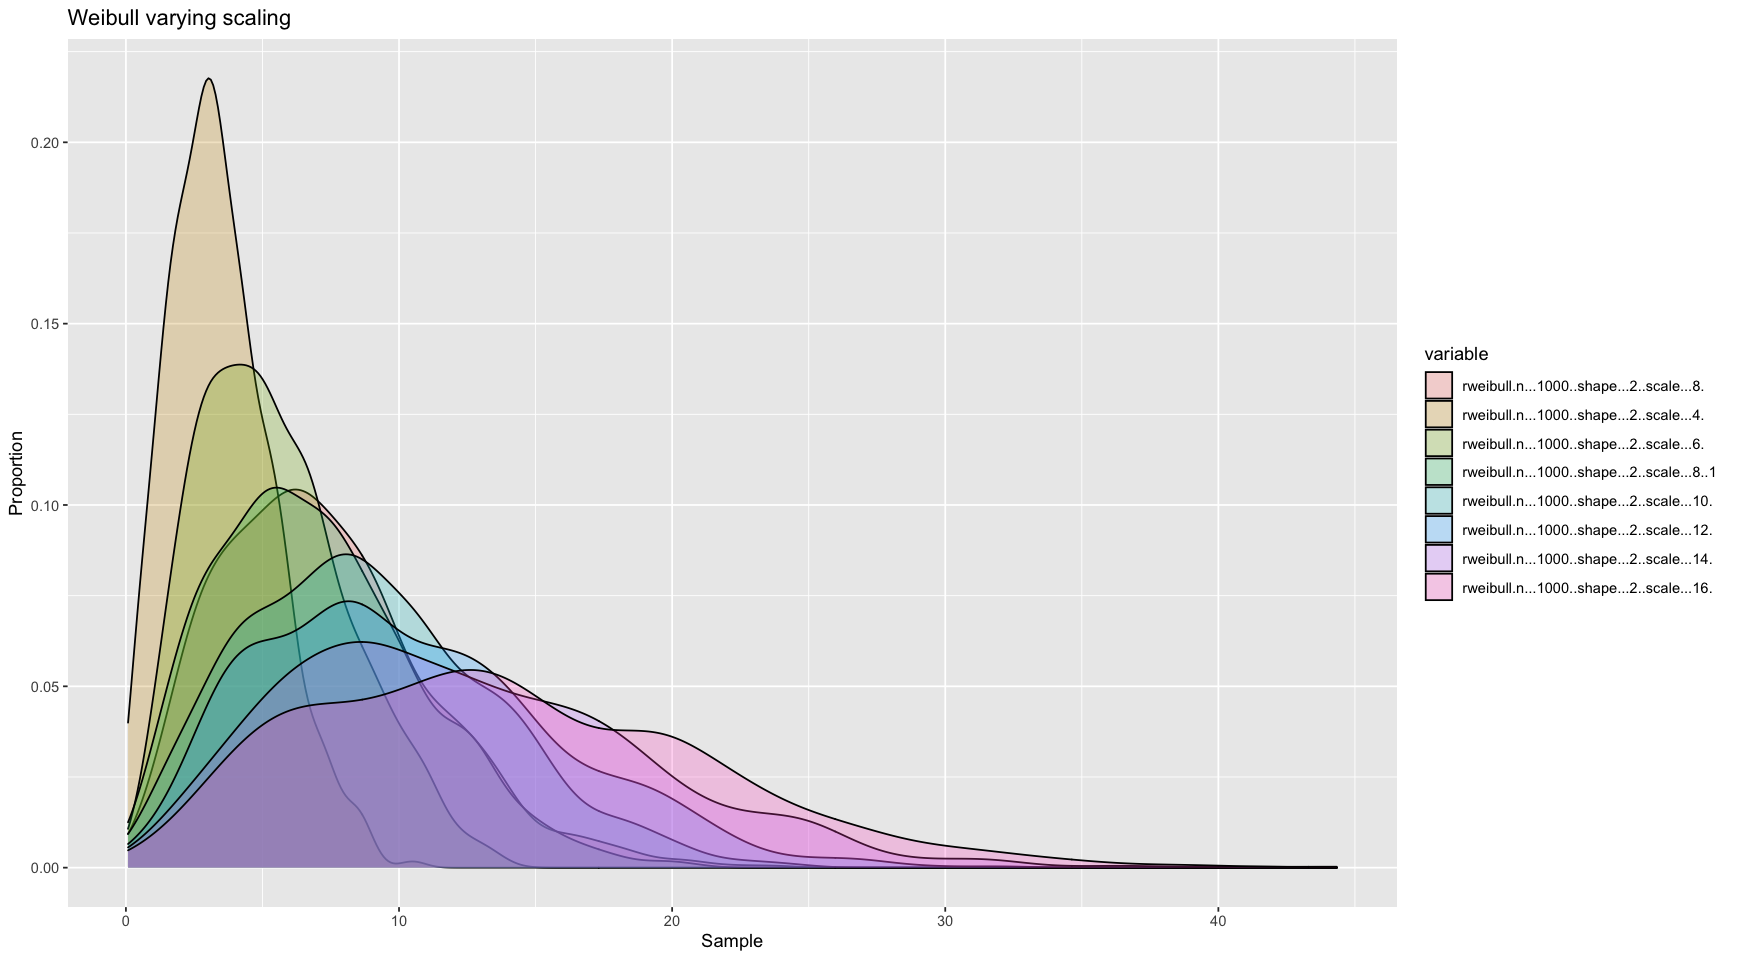

In [25]:
# curve(dweibull(x, shape=2, scale = 1), from=0, to=4)
# curve(dweibull(x, shape=2, scale = 2), from=0, to=4)
# curve(dweibull(x, shape=2, scale = 3), from=0, to=4)

x <- data.frame(std.nromal=rnorm(1000, m=0, sd=1),
                     wide.normal=rnorm(1000, m=0, sd=2),
                     exponent=rexp(1000, rate=1),
                     uniform=runif(1000, min=-3, max=3)
                     )
nx<-data.frame(rweibull(n = 1000,shape=2,scale=8),
  rweibull(n=1000, shape=2, scale = 4),
rweibull(n=1000, shape=2, scale = 6),
rweibull(n=1000, shape=2, scale = 8),rweibull(n=1000, shape=2, scale = 10),
rweibull(n=1000, shape=2, scale =12),rweibull(n=1000, shape=2, scale = 14),            
rweibull(n=1000, shape=2, scale = 16))

library(reshape2)
data<- melt(nx)
g_<-ggplot(data,aes(x=value, fill=variable)) + geom_density(alpha=0.25)
g_+labs(x = 'Sample',
       y = 'Proportion',
       title = 'Weibull varying scaling')
# ggplot(data,aes(x=value, fill=variable)) + geom_histogram(alpha=0.25)
# ggplot(data,aes(x=variable, y=value, fill=variable)) + geom_boxplot()

#citations below

In [8]:
# 

No id variables; using all as measure variables



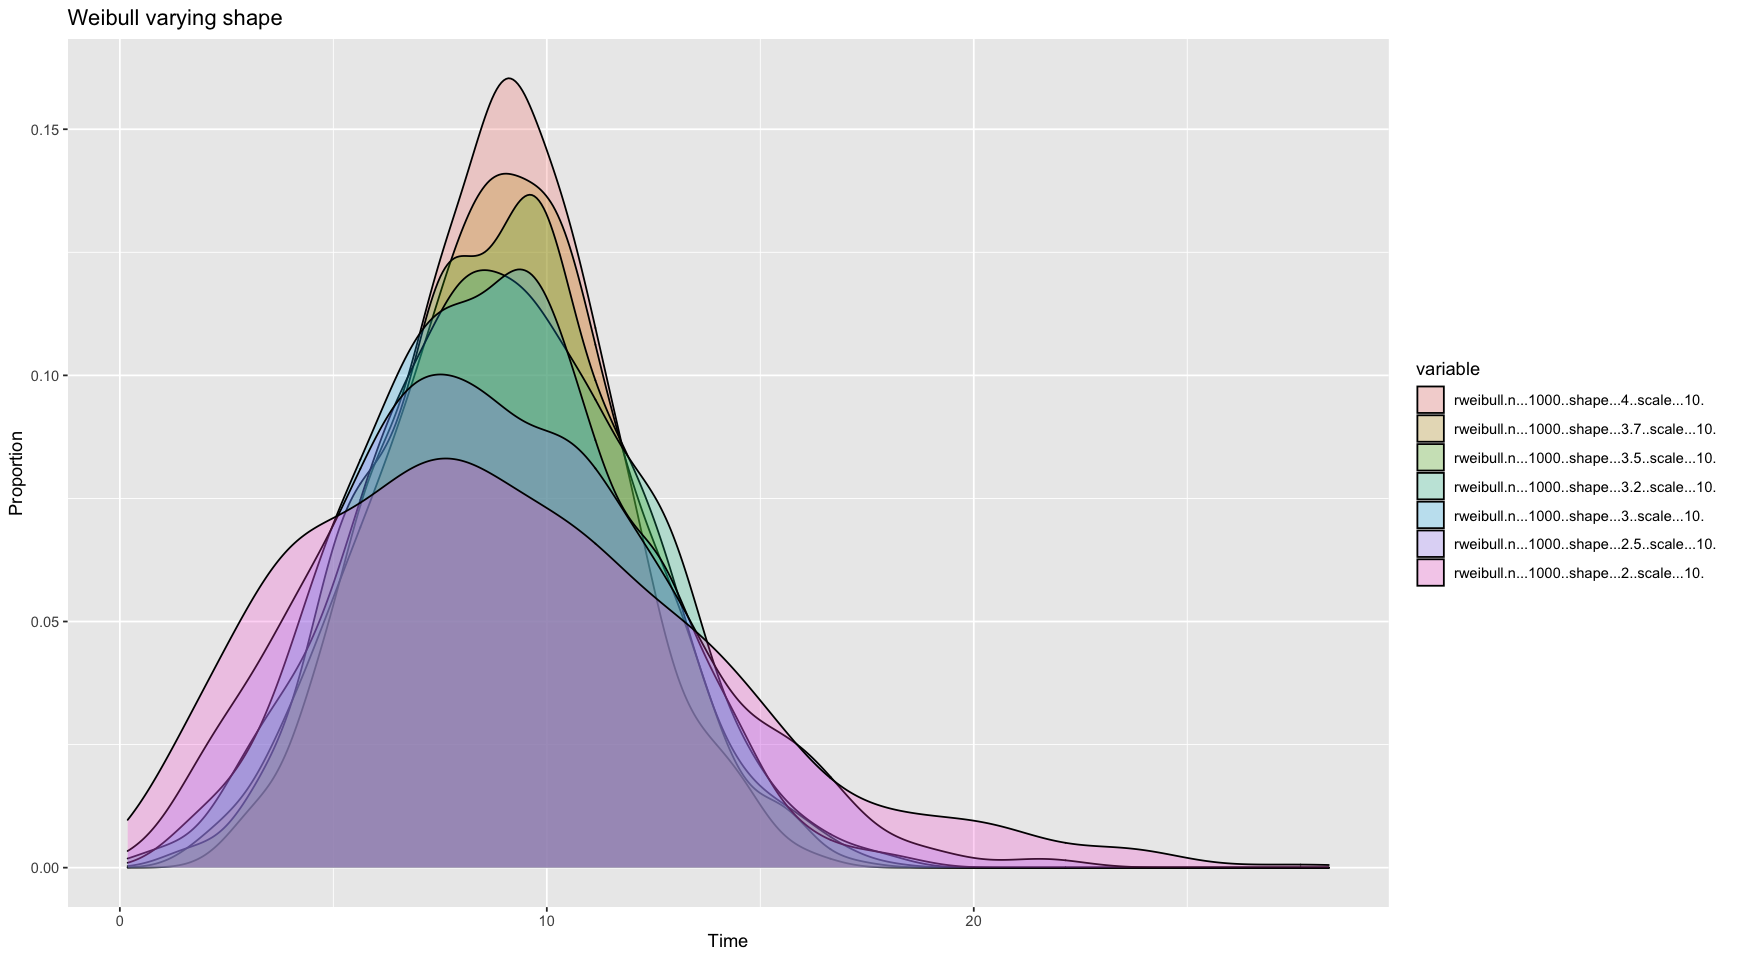

In [26]:
x <- data.frame(std.nromal=rnorm(1000, m=0, sd=1),
                     wide.normal=rnorm(1000, m=0, sd=2),
                     exponent=rexp(1000, rate=1),
                     uniform=runif(1000, min=-3, max=3)
                     )
nx<-data.frame(rweibull(n = 1000,shape=4,scale=10),
  rweibull(n=1000, shape=3.7, scale = 10),
rweibull(n=1000, shape=3.5, scale = 10),
rweibull(n=1000, shape=3.2, scale = 10),rweibull(n=1000, shape=3, scale = 10),
rweibull(n=1000, shape=2.5, scale =10),rweibull(n=1000, shape=2, scale = 10)) 

library(reshape2)
data<- melt(nx)
ggplot(data,aes(x=value, fill=variable)) + geom_density(alpha=0.25)+
labs(x = 'Time',
       y = 'Proportion',
       title = 'Weibull varying shape')

# `Shape parameter between values of (3-4):` 

`we notice something`

+ We have a bell curve, which is always comforting but it tells us something useful:
we will notice that failures will become prone at the end of life for a product such as the life of parts just failing. 

*citation at bottom: from minitab*

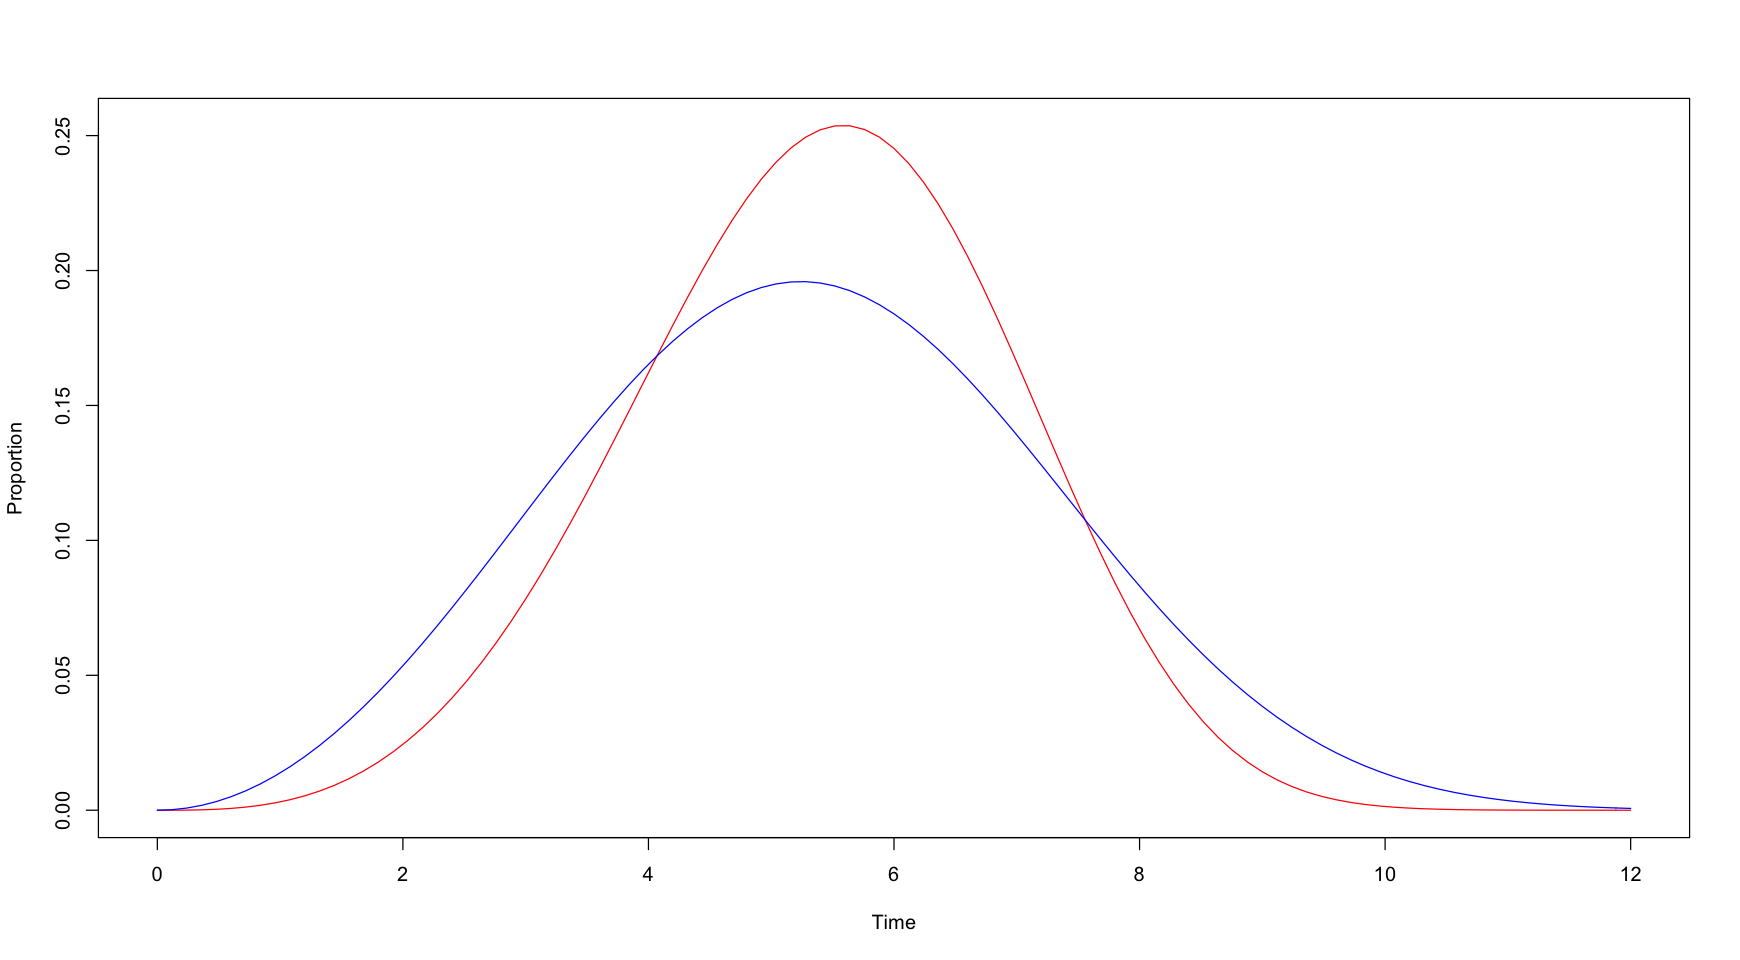

In [27]:
curve(dweibull(x, shape=4, scale = 6), from=0, to=12, col='red',xlab = "Time",
      ylab = "Proportion")
curve(dweibull(x, shape=3, scale = 6), from=0, to=12, col='blue', add=TRUE)

# `Shape parameter of 2: `

+ notice: that you have a sharp increase and then the number of failures decrease over time

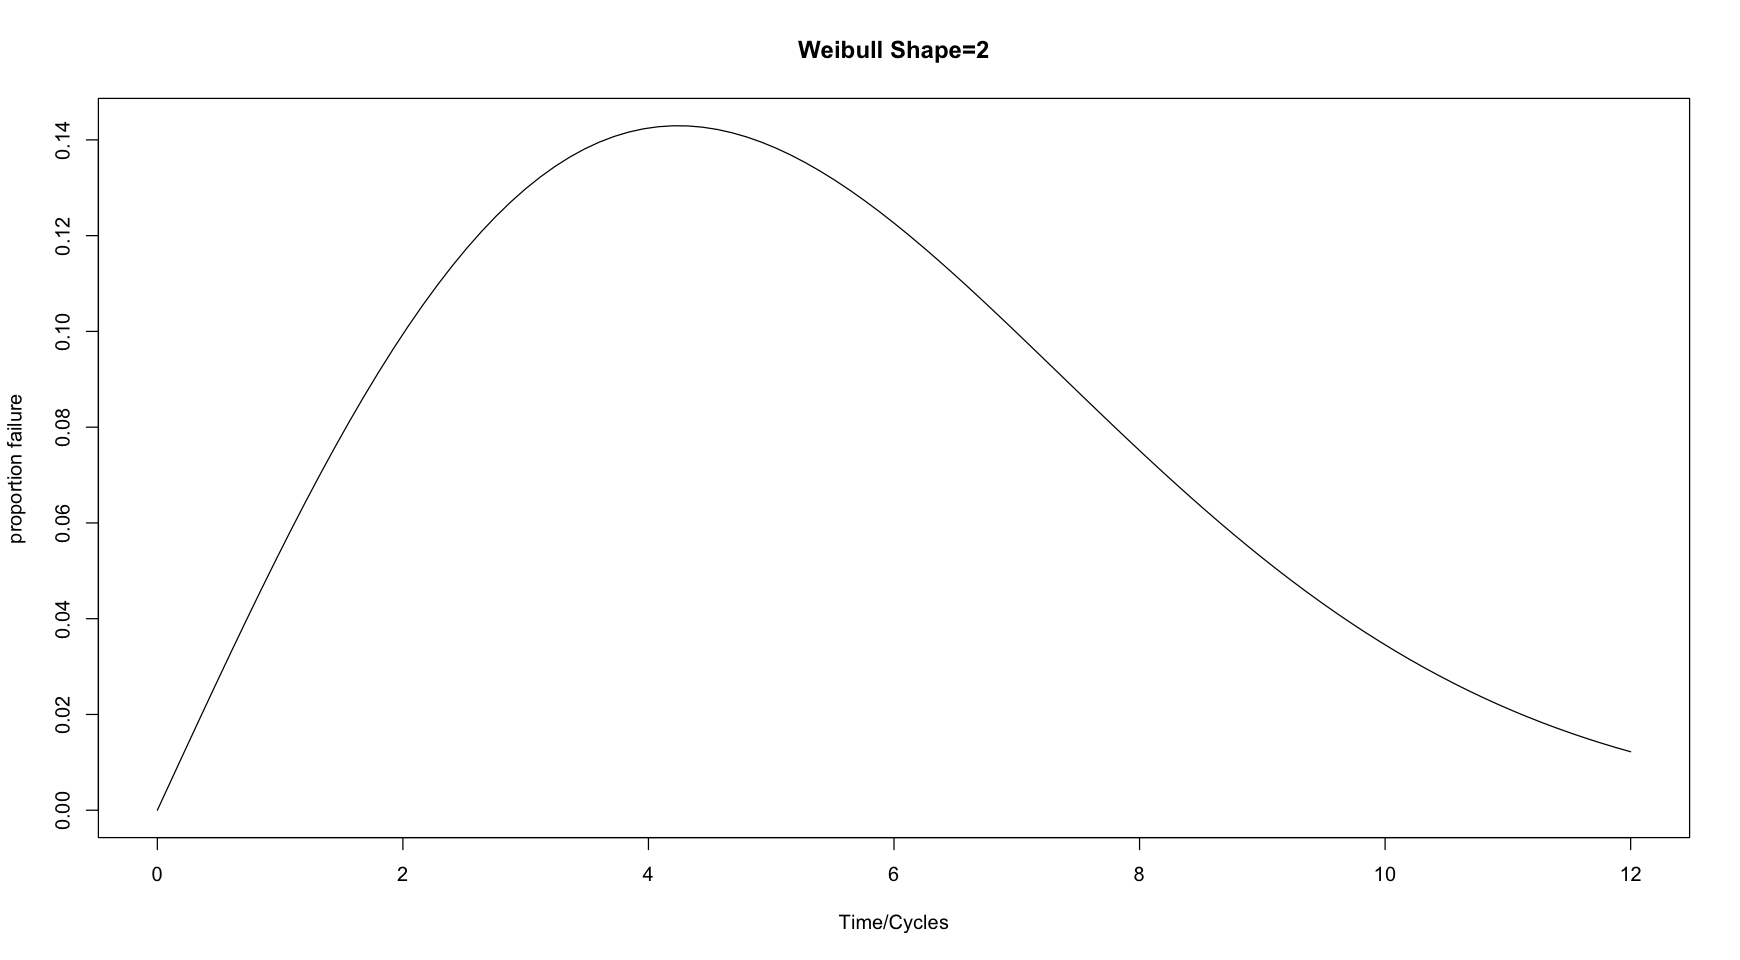

In [28]:
curve(dweibull(x, shape=2, scale = 6), from=0, to=12, col='black',
      xlab="Time/Cycles",ylab="proportion failure",main="Weibull Shape=2")


# You are seeing a `high number of failures initially` with `Shape < 1`

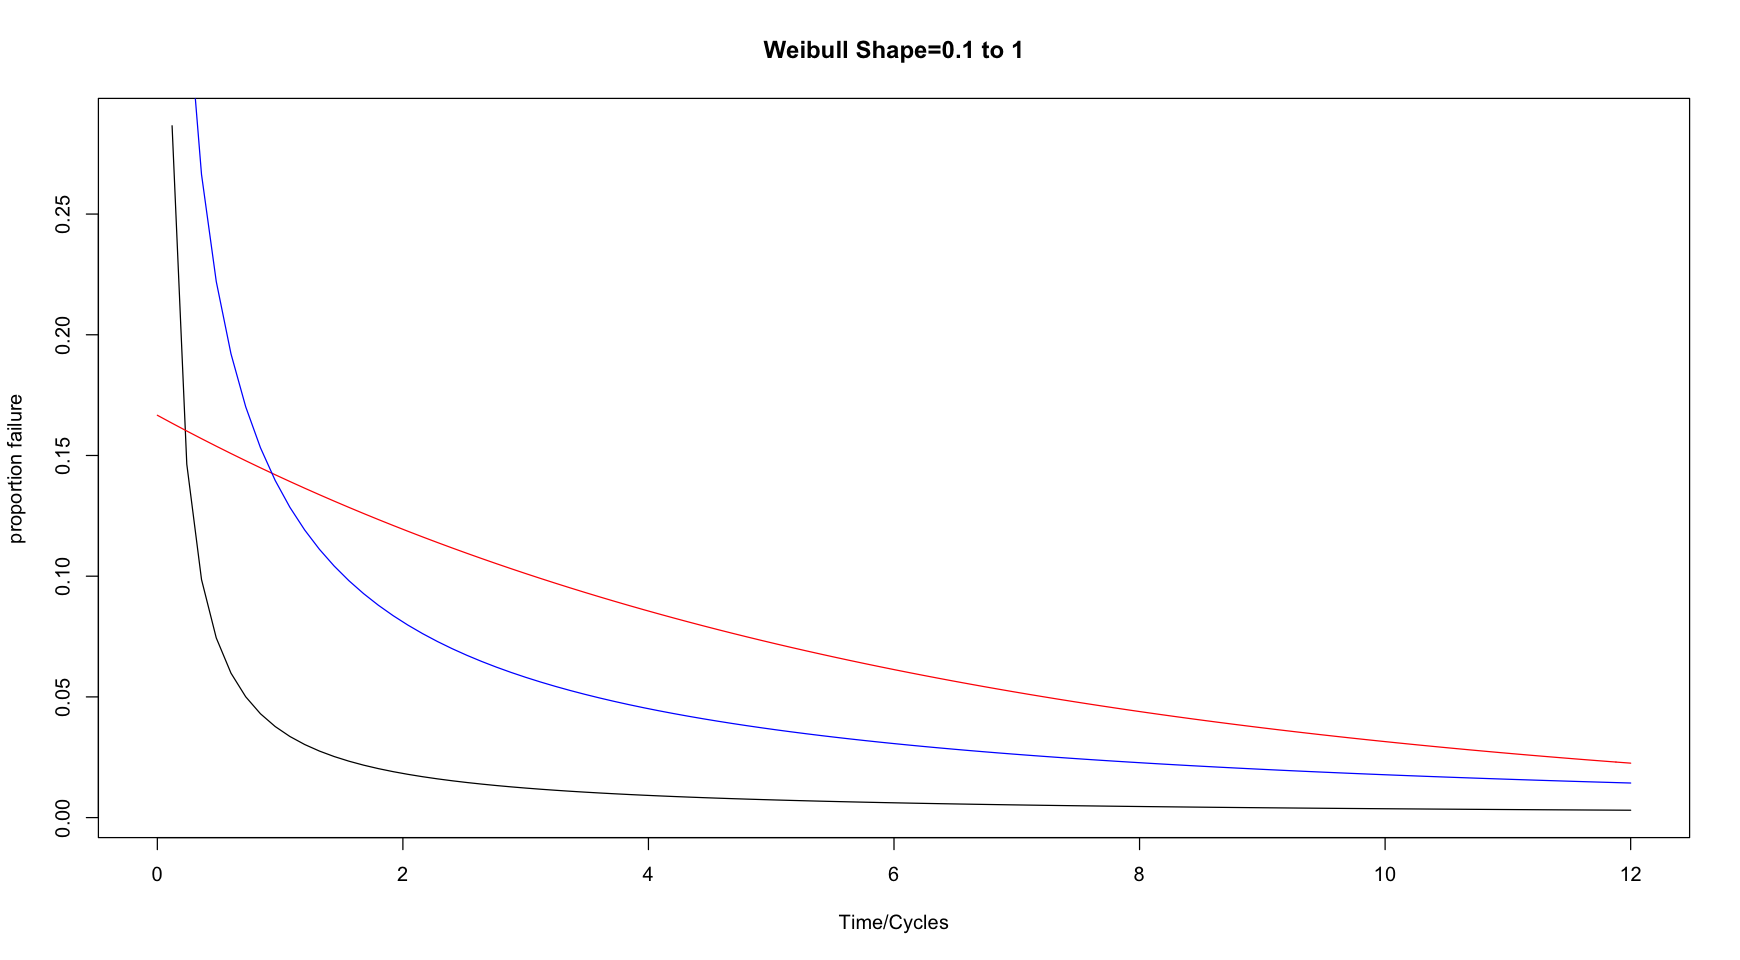

In [29]:
curve(dweibull(x, shape=.1, scale = 6), from=0, to=12, col='black',
     xlab="Time/Cycles",ylab="proportion failure",main="Weibull Shape=0.1 to 1")
curve(dweibull(x, shape=1, scale = 6), from=0, to=12, col='red',
     xlab="Time/Cycles",add=TRUE)
curve(dweibull(x, shape=.5, scale = 6), from=0, to=12, col='blue',
     xlab="Time/Cycles",add=TRUE)

# `Gamma:` 

`continuous`

* *good if you have pretty skewed data*
* *measuring time between occurences of an event*

`PDF`

<font size=6>$f(x) = \frac{(\frac{x-\mu}{\beta})^{\gamma-1} e^{(-\frac{x-\mu}{\beta})}}{\beta\Gamma\gamma}$</font>

+ $\gamma$: shape parameter
    + $\mu$: locations
        + $\beta$: scaling
+ $\Gamma$: gamma function $\int_{0}^{\infty} t^{a-1} e^{-t}dt$

`Alternate More Common Version:`

<font size=6>$ f(x) = \frac{x^{\alpha-1} e^{(-\frac{x}{\beta})}}{\beta^{\alpha}\Gamma (\alpha)}$</font>

+ $\alpha$: shape parameter
    + $\beta$: rate parameter

`---------------------`

**Some use cases**: `insurance risk, rainfall data, economics, inventory control, particulate concentrations`

`Mean`:$E[x]=\alpha \beta$

`Variance`: $\alpha \beta^2$

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“NAs introduced by coercion”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“NAs introduced by coercion”


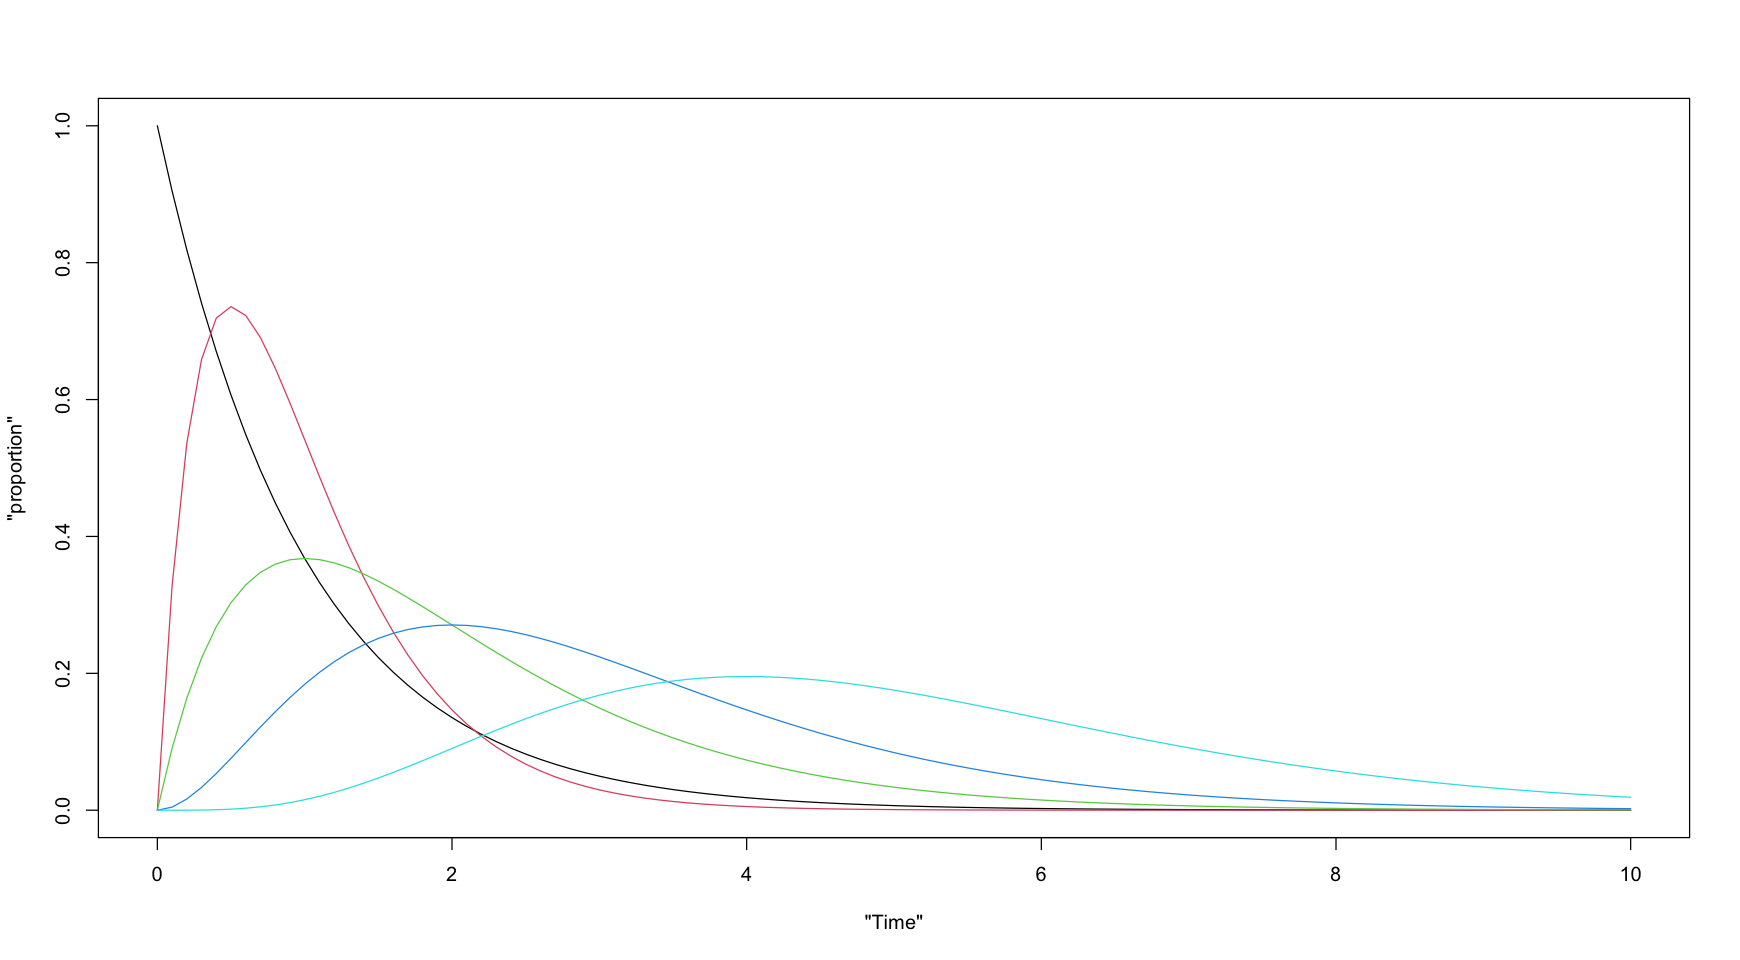

In [30]:
# # library(lmtest)
# sample<- rweibull(5000, shape=1, scale = 2) + 10
# ussample<-sample-10
# m.shape10 <-  rgamma(5000, shape=10, scale = 1)
# # hist(ussample,freq=F,breaks=100,main="Take a look to data...")
# m=mean(ussample);std=sd(ussample);m;std
# # hist( m.shape10, freq=F )

# x<-seq(0,max(m.shape10),100)
# # curve(dgamma(x,shape=10,scale=1),col=2,add=T)

# hist( m.shape10, freq=F )
# x<-seq(0,max(m.shape10),100)
# curve(dgamma(x,shape=10,scale=1),col=2,add=T)


k <- c(1, 2, 2,3,5)
mu <- c(1, 1, 2,3,5)
theta <- mu/k
plot('Time', 'proportion', xlim = c(0, 10), ylim = c(0, 1), type = "n")
for(i in seq_along(k))
    curve(dgamma(x, shape = k[i], scale = theta[i]), from = 0,
          to = 10, col = i, add = TRUE)


# Notice that the `Gamma` plot:

+ As you increase: shape (k) in plot you will have a spike and a flattening if increasing scale (mu) here.

+ When k=mu=1 then you have an exponential plot in (black)

# `F Distribution:` 

`continuous`

<font size=5>$f(x) = \frac{\Gamma (\frac{m+n}{2}) m^{\frac{m}{2}} (\frac{n}{m})^{\frac{n}{2}}}{\Gamma \frac{n}{2} \Gamma \frac{m}{2} [x \frac{n}{m}+1]^{\frac{n+m}{2}}}$</font>

The two degrees of freedom are (*m=numerator*) and (*n=denominator*) and the end points dictate the curve formed by the probabilities

**Use cases:** `used to test difference between two variances or two way ANOVA and used for inference`

+ defined for positive values

+ not symmetric about the mean ($\mu$)


**Tips:** 

+ If you have data with large `variance` put that in the numerator to keep a right tailed plot

+ If using a 2 tailed test: use $\frac{\alpha}{2}$

+ If given the standard deviation you will need to square them to get the variance

+ If the degrees of freedom aren't given, use the critical value from a table to avoid type-I error.

<font size=5>`Mean:` $\frac{V_2}{V_2-2}$, for $V_2 >2$</font> 


<font size=5>`Variance:`$\sqrt \frac{[2*V_2^2(V_1+V_2-2)]}{[V_1(V_2-2)^2 (V_2-4)]}$,for $V_2 >4$</font>

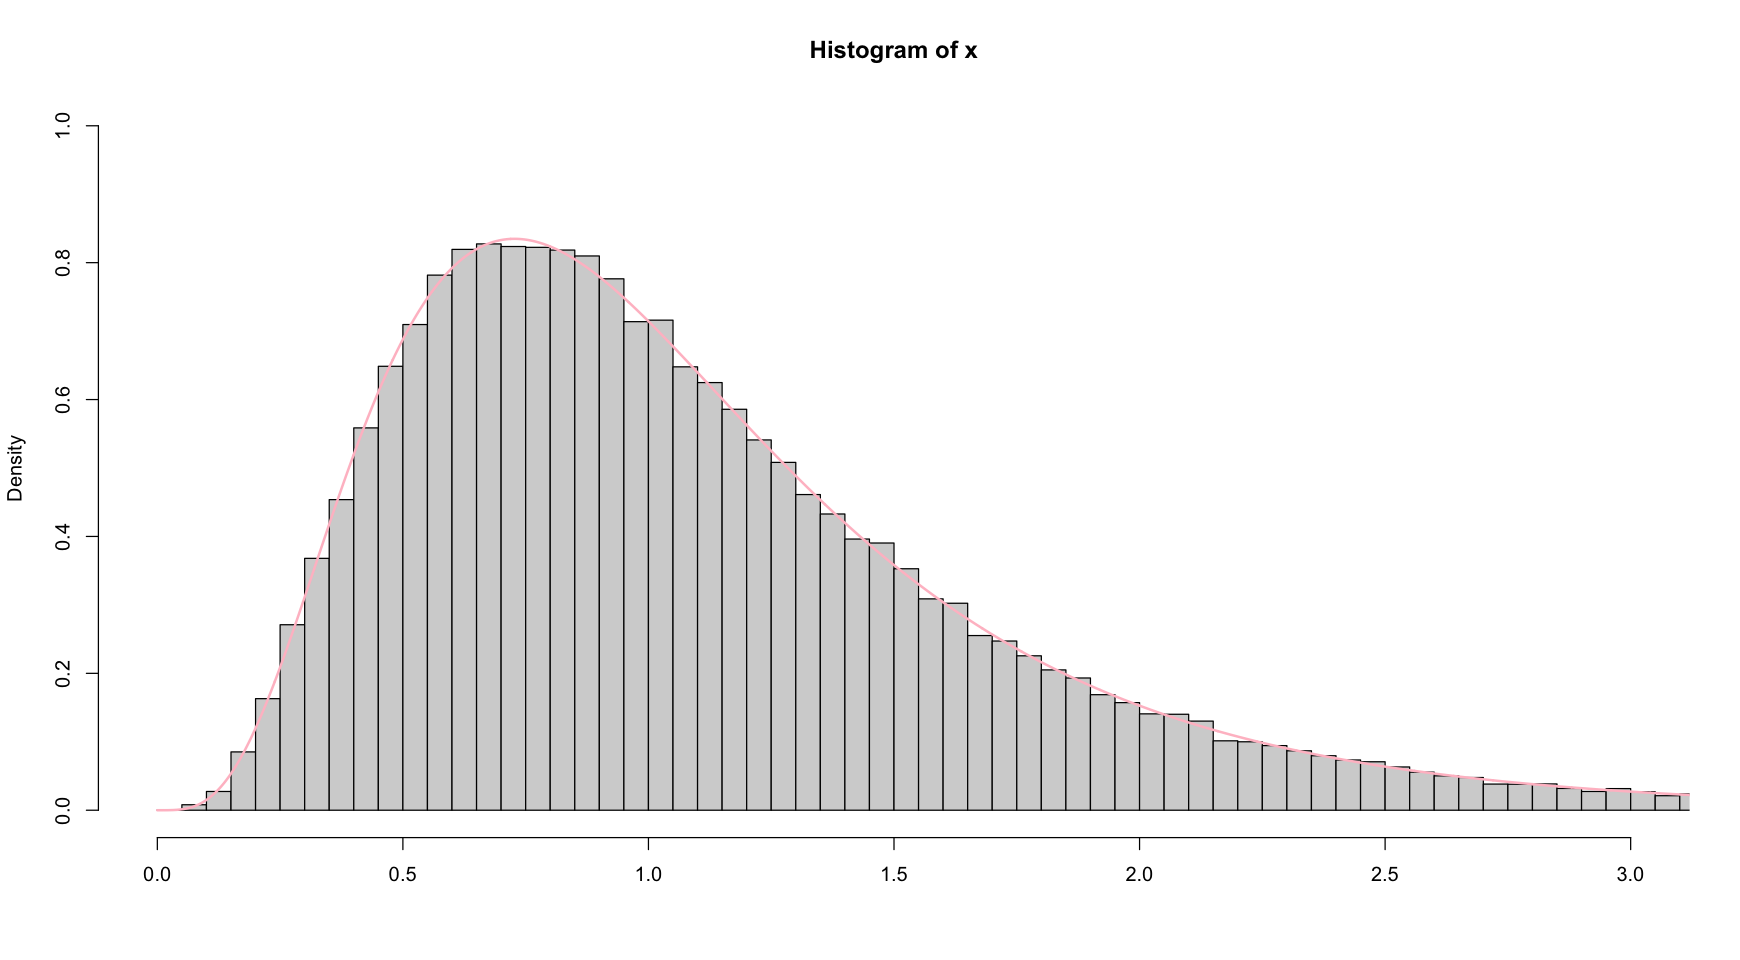

In [31]:

x <- rf(100000, df1 = 10, df2 = 20)
hist(x, 
     breaks = 'Scott', 
     freq = FALSE, 
     xlim = c(0,3), 
     ylim = c(0,1),
     xlab = '') 
#      main = (TeX('Histogram for a $\\F$-distribution with $\\v_1 = 10$ and $\\v_2 = 20$ degrees of freedom (df)')), cex.main=0.9)

curve(df(x, df1 = 10, df2 = 20), from = 0, to = 4, n = 5000, col= 'pink', lwd=2, add = T)


# df_1 <- c(10, 10, 10)
# df_2 <- c(20, 30, 60)
# # theta <- mu/k
# plot(0, 0, xlim = c(0, 70), ylim = c(0, 1), type = "n")
# for(i in seq_along(df_1))
#   curve(dgamma(x=x[i], df1 = df_1[i], df2 = df_2[i]), from = 0, to = 70, col = i, add = TRUE)

# `As you increase degrees of freedom for both:`

`you will start getting closer to a (approx.) normal distribution`

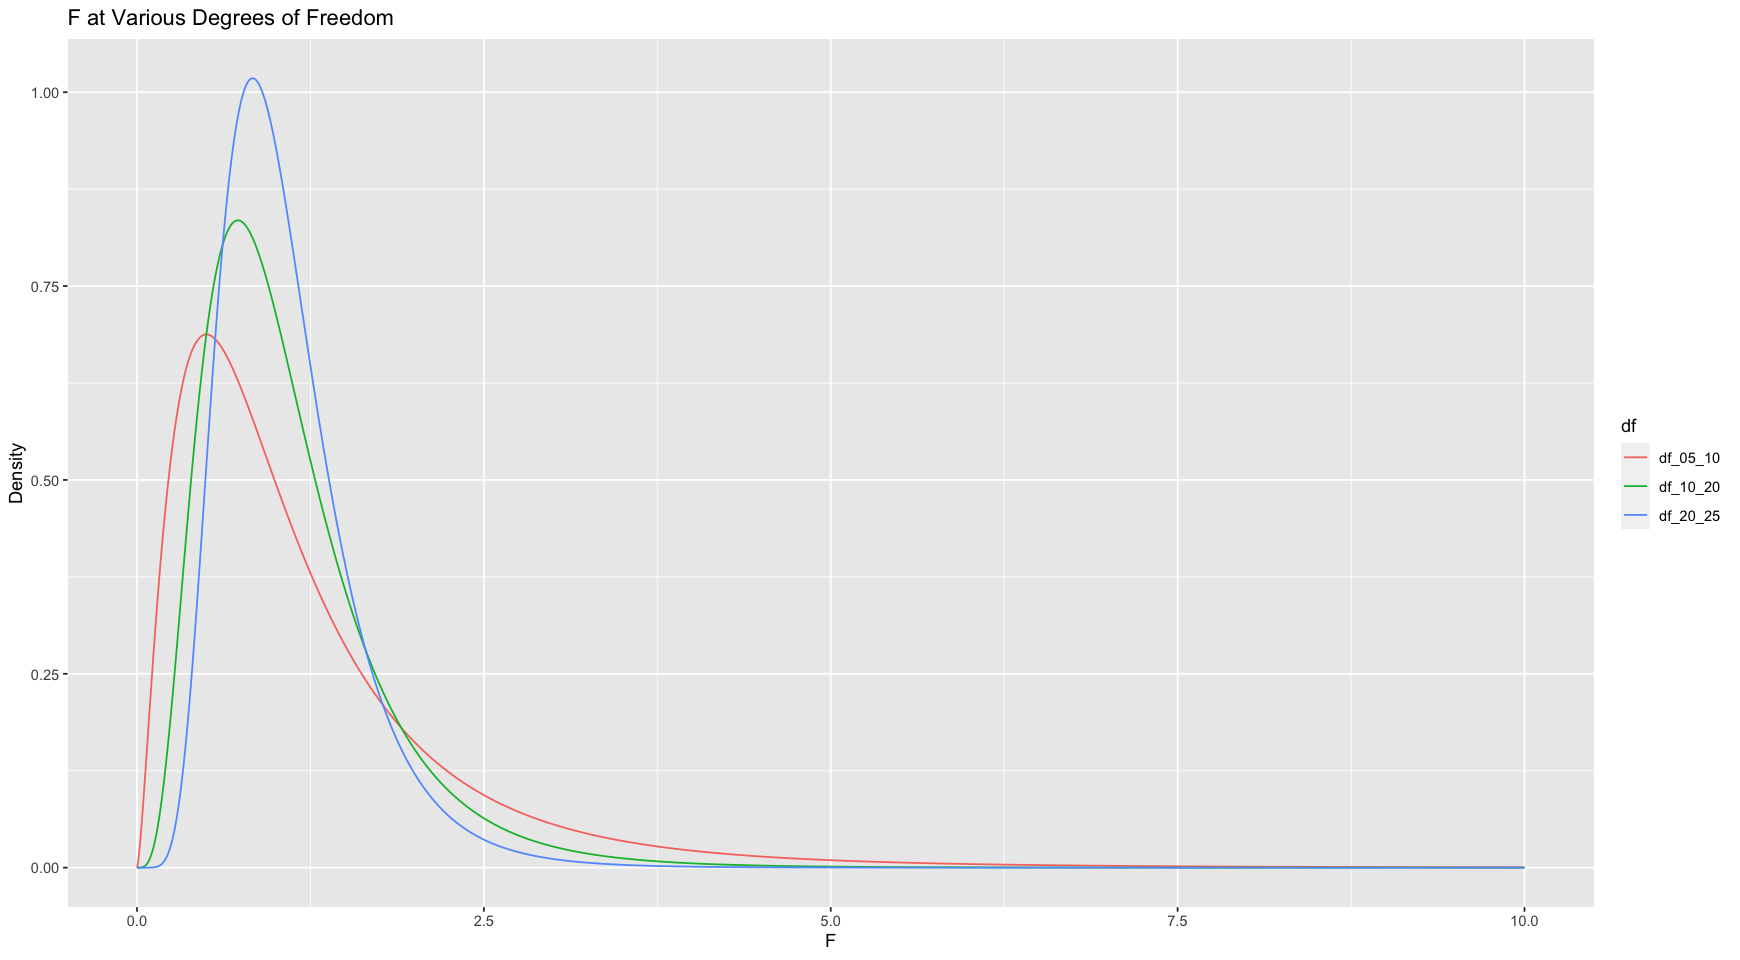

In [32]:
# library(tidyr)

data.frame(f = 0:1000 / 100) %>% 
           mutate(df_10_20 = df(x = f, df1 = 10, df2 = 20),
                  df_05_10 = df(x = f, df1 = 5, df2 = 10),
                 df_20_25 = df(x = f, df1 = 20, df2 = 25)
                 ) %>%
  gather(key = "df", value = "density", -f) %>%
ggplot() +
  geom_line(aes(x = f, y = density, color = df)) +
  labs(title = "F at Various Degrees of Freedom",
       x = "F",
       y = "Density") 

# `Chi Square Distribution:` 

`skewed to the right, continuous`

<font size=4>$V=X^2_1+X^2_2+...X^2_n$ ~ $X^2_n$</font>, with (n) random variables with a standard normal distribution

`PDF`

<font size=5>$f(x;k) = \frac{x^{\frac{k}{2}-1} e^{-\frac{x}{2}}}{2\frac{k}{2} \Gamma \frac{k}{2}}$</font>

`Use Cases:`

* `Estimate Confidence Intervals` from a population (std dev.) of a normal distribution for a given sample

* `Check for independence`

* `Find differences between observed and expected`

* Can use for `goodness of fit` using Chi-Sq test

The distribution is dependent upon the number of `degrees of freedom` which will be `df = (# rows-1)(# columns-1)` or `number of samples - 1`

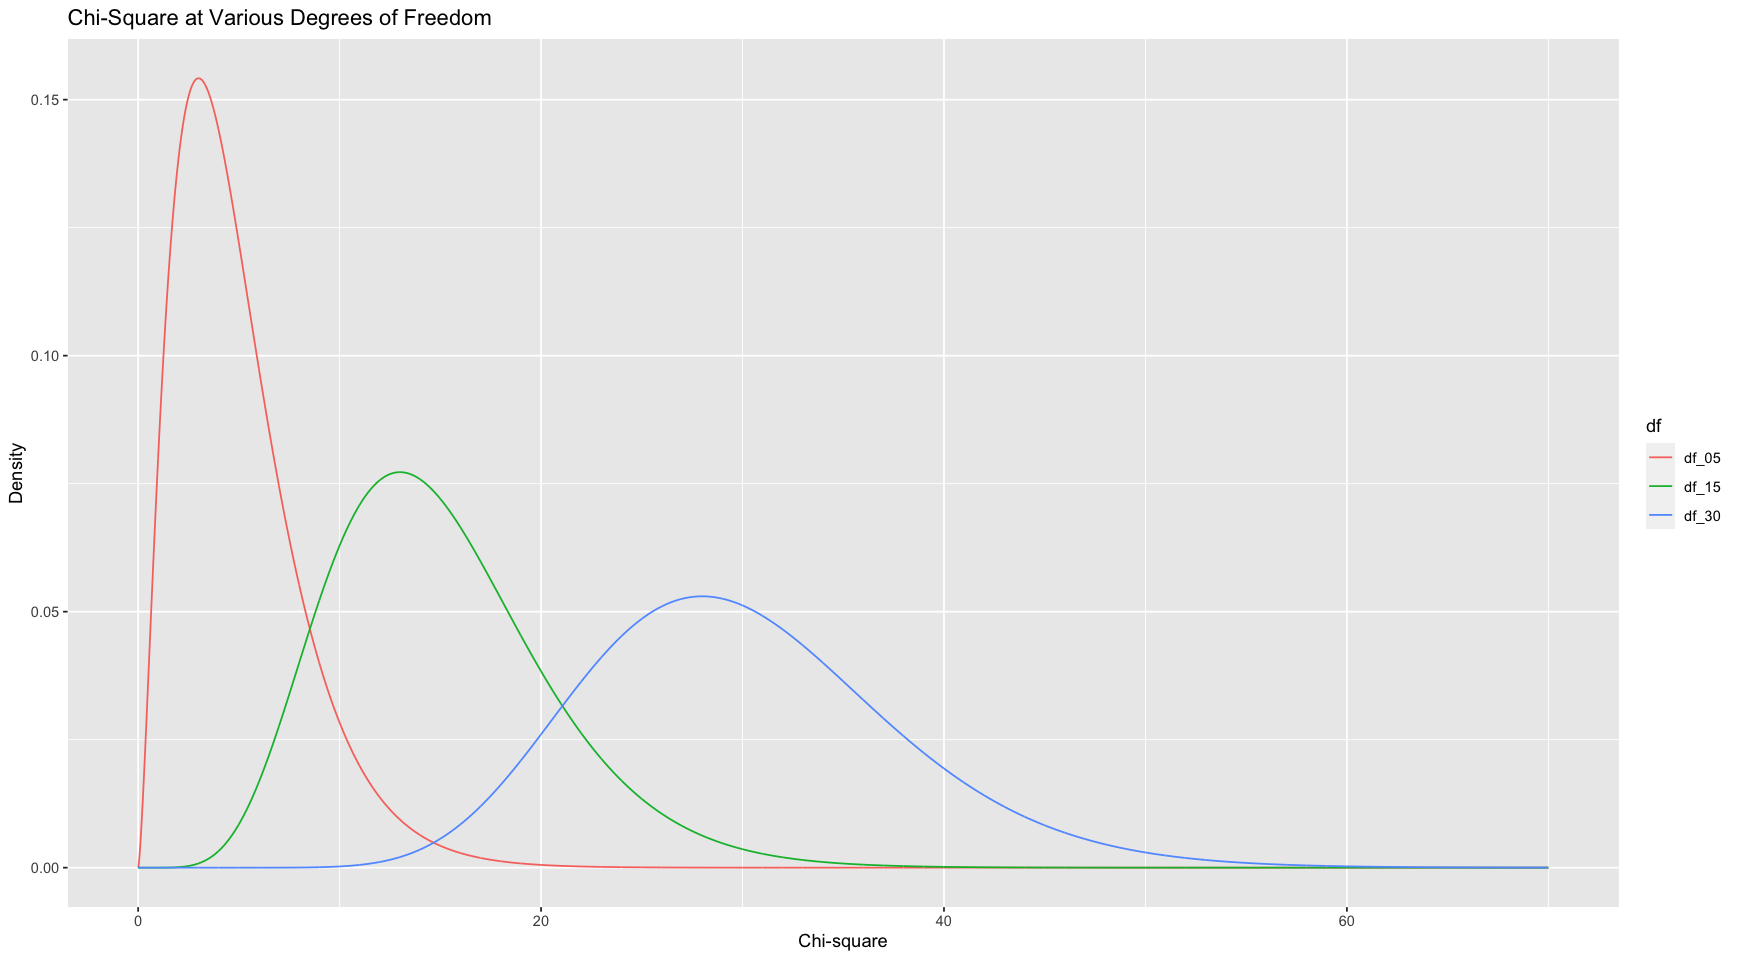

In [33]:
data.frame(chisq = 0:7000 / 100) %>% 
           mutate(df_05 = dchisq(x = chisq, df = 5),
                  df_15 = dchisq(x = chisq, df = 15),
                  df_30 = dchisq(x = chisq, df = 30)) %>%
  gather(key = "df", value = "density", -chisq) %>%
ggplot() +
  geom_line(aes(x = chisq, y = density, color = df)) +
  labs(title = "Chi-Square at Various Degrees of Freedom",
       x = "Chi-square",
       y = "Density") 

# plot from R-documentation and in citations

# `Student T-test:`

`Continuous`

`-------------`

+ Great for hypothesis testing, used when you want to `estimate the mean of a normal distribution with a small sample size` and used to check the `statistical significance between two sample means or confidence intervals`


<font size=5>$t = \frac {Z}{\sqrt(\frac{V}{m})}$ ~ $t_m$</font>

+ Assuming that `Z` has a (*standard*) `normal distribution`, where `V` has a `Chi Sq. distribution` with `m` `degrees of freedom`

**Simplify this (more common version):**

`PDF`

<font size=6>$t = \frac {\bar X - \mu }{\frac{\sigma_{sample}}{\sqrt n}}$ </font>

**Also, the `t distribution` has `df=n-1`**

`---------------`

**Simplify above statement**: `think of it like this, you are looking to see if two populations are the same with respect to the variable you are testing and returning a probability`

* Consider using this when: you have small sample sizes and have a somewhat normal distribution without outliers and not a lot of skewness.
    * The higher number of degrees of freedom you have; this will approach a normal distribution


`Since you don't usually know the population you are instead doing an estimatation`

* As you increase the number of degrees of freedom you will approach the standard normal distribution

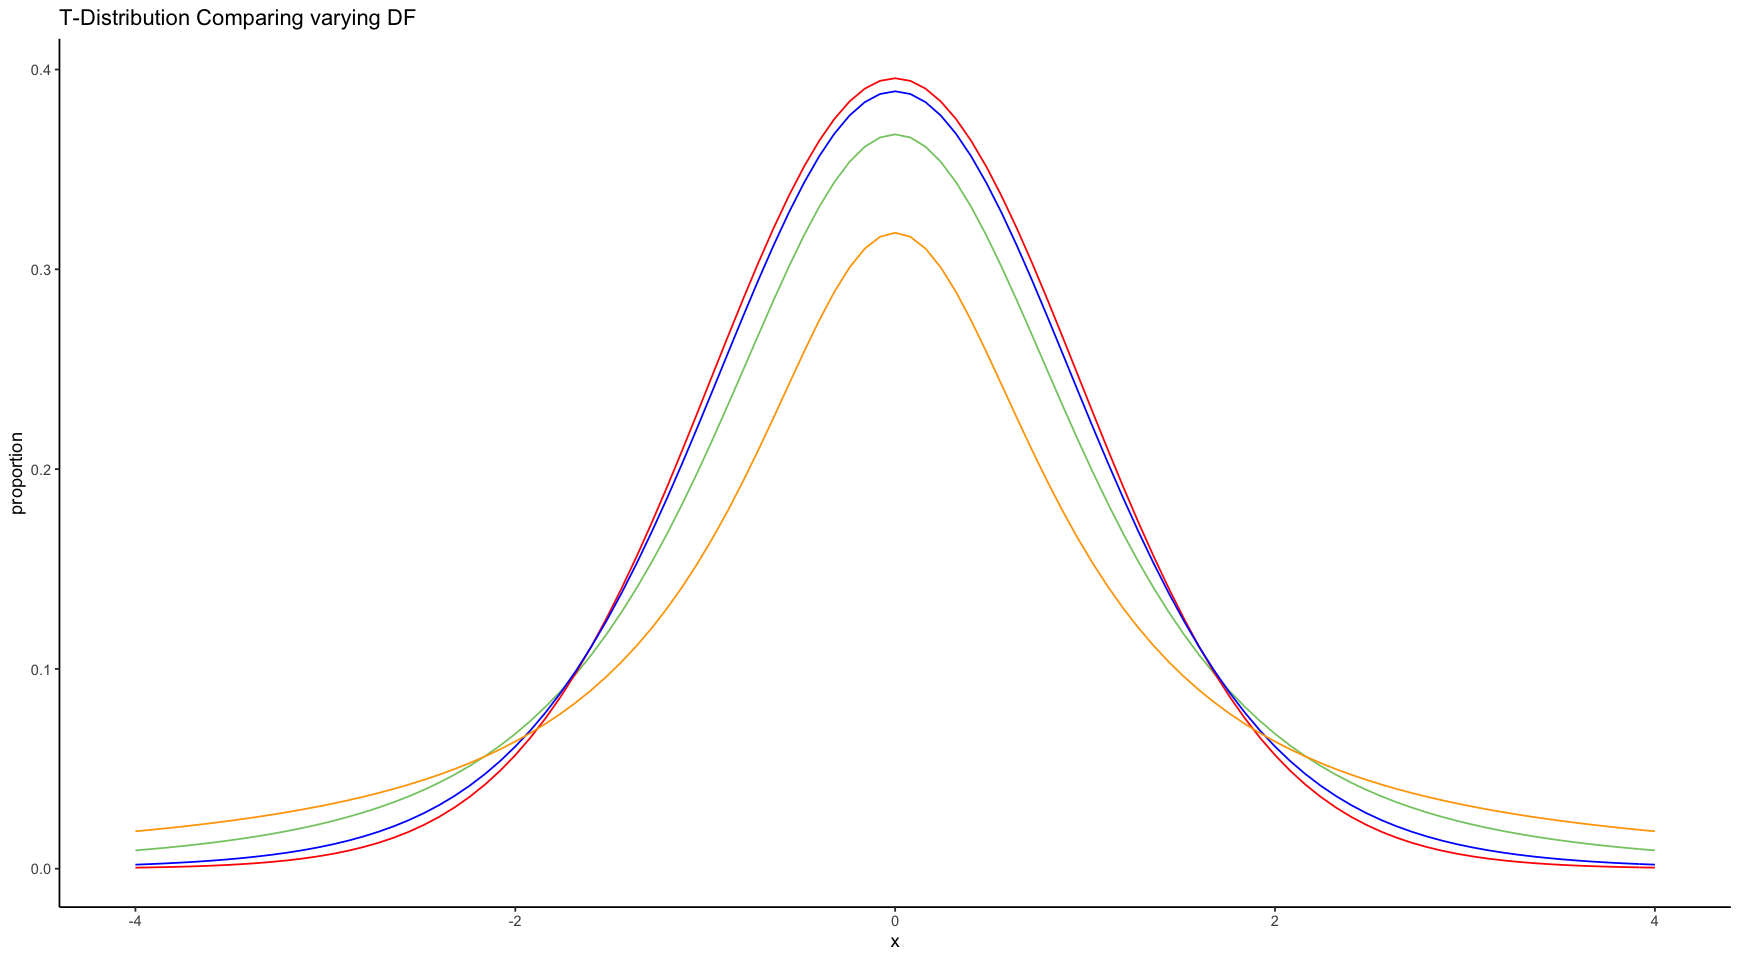

In [34]:
# As You ICREASE THE DEGREES OF FREEDOM APPROACHES NORMAL DISTRIBUTION

p <- data_frame(x = c(-4,4)) %>% 
    ggplot(aes(x = x)) 

p + stat_function(fun = dt, args = list(df = 3), color = "#84CA72", size = .5) +
    stat_function(fun = dt, args = list(df = 30), size = .5,color='red')  +
    stat_function(fun = dt, args = list(df = 10), size = .5,color='blue')+
    stat_function(fun = dt, args = list(df = 1), size = .5,color='orange')+
    ggtitle("T-Distribution Comparing varying DF") +
    xlab("x") +
    ylab("proportion") +
    theme_classic()

# `Logistic:` 

`continuous`

Resembles the Normal distribution but has longer (heavier) tails

`PDF`

<font size=6>$f(x) = \frac{e^{\frac{x-\mu}{\sigma}}}{\sigma({1+e^{\frac{x-\mu}{\sigma}}})^2}$</font>, $x \in \mathbb{R}$

**Common uses**`used with logistic regression (very common for data analysis), used with feedforward neural networks`

+ Uses with `categorical data` with dependent variables such as (*binary classification*)
    + good for population growth, chemical reactions

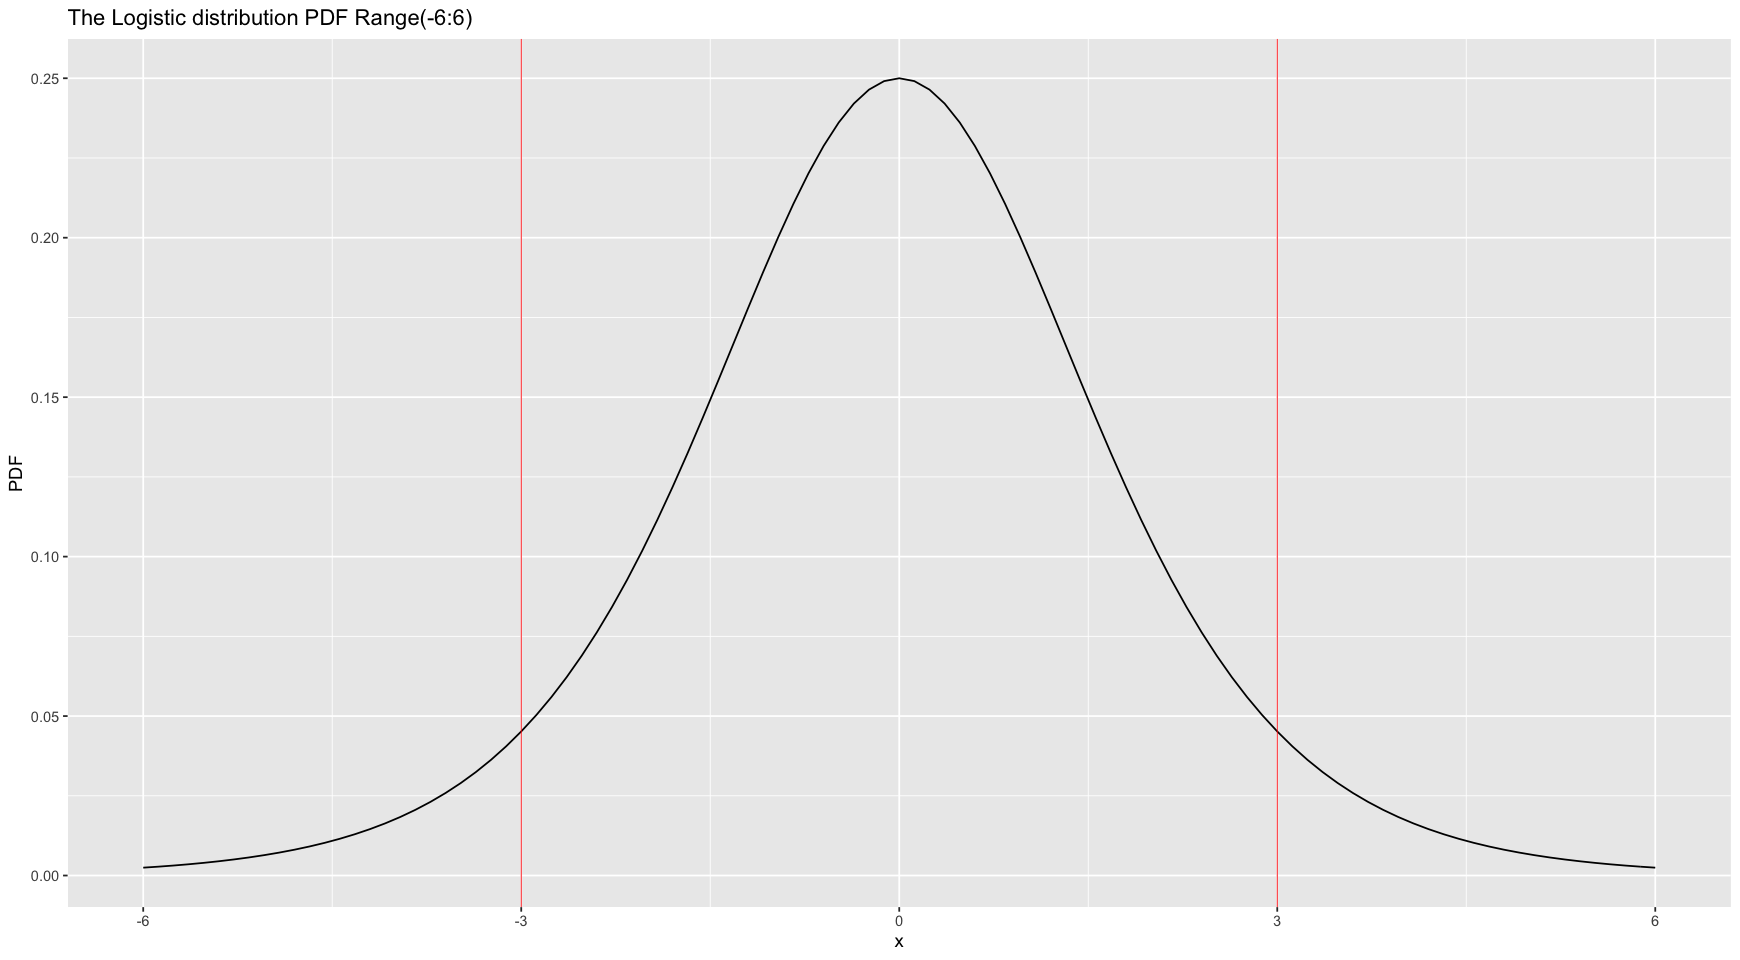

In [35]:

PDF_LD <- function(x) { y <- exp(x)/((1+exp(x))^2)}
 
# Plot PDF
 
ggplot(data.frame(x=c(-6, 6)), aes(x)) + stat_function(fun=PDF_LD) + geom_vline(xintercept = 3, 
                color = "red", size=.25) + geom_vline(xintercept = -3, 
                color = "red", size=.25) + labs(title = "The Logistic distribution PDF Range(-6:6)", y = "PDF")

# Lets look at what our data look like when you vary parameters
[Logistic Distribution Wiki Ex.](https://en.wikipedia.org/wiki/Logistic_distribution)


`-------------------------------`

# `Pareto:` 

`power law probability distribution,continuous`

`-----------------`

`PDF`

<font size=6>$f(x) = \frac{\alpha \beta^\alpha}{x^{1+\alpha}}$</font>
    
<font size=4>$x_m$: minimum value of x</font>

<font size=4>$\alpha$: shape parameter (slope), used for finding concentration near mode</font>

<font size=4>$\beta$: scale parameter</font>

**Uses:** `good for looking at wealth distribution, changes in stock prices, natural resource occurences, geophysical, quality control, scientific, actuarial applications, natural phenomena`



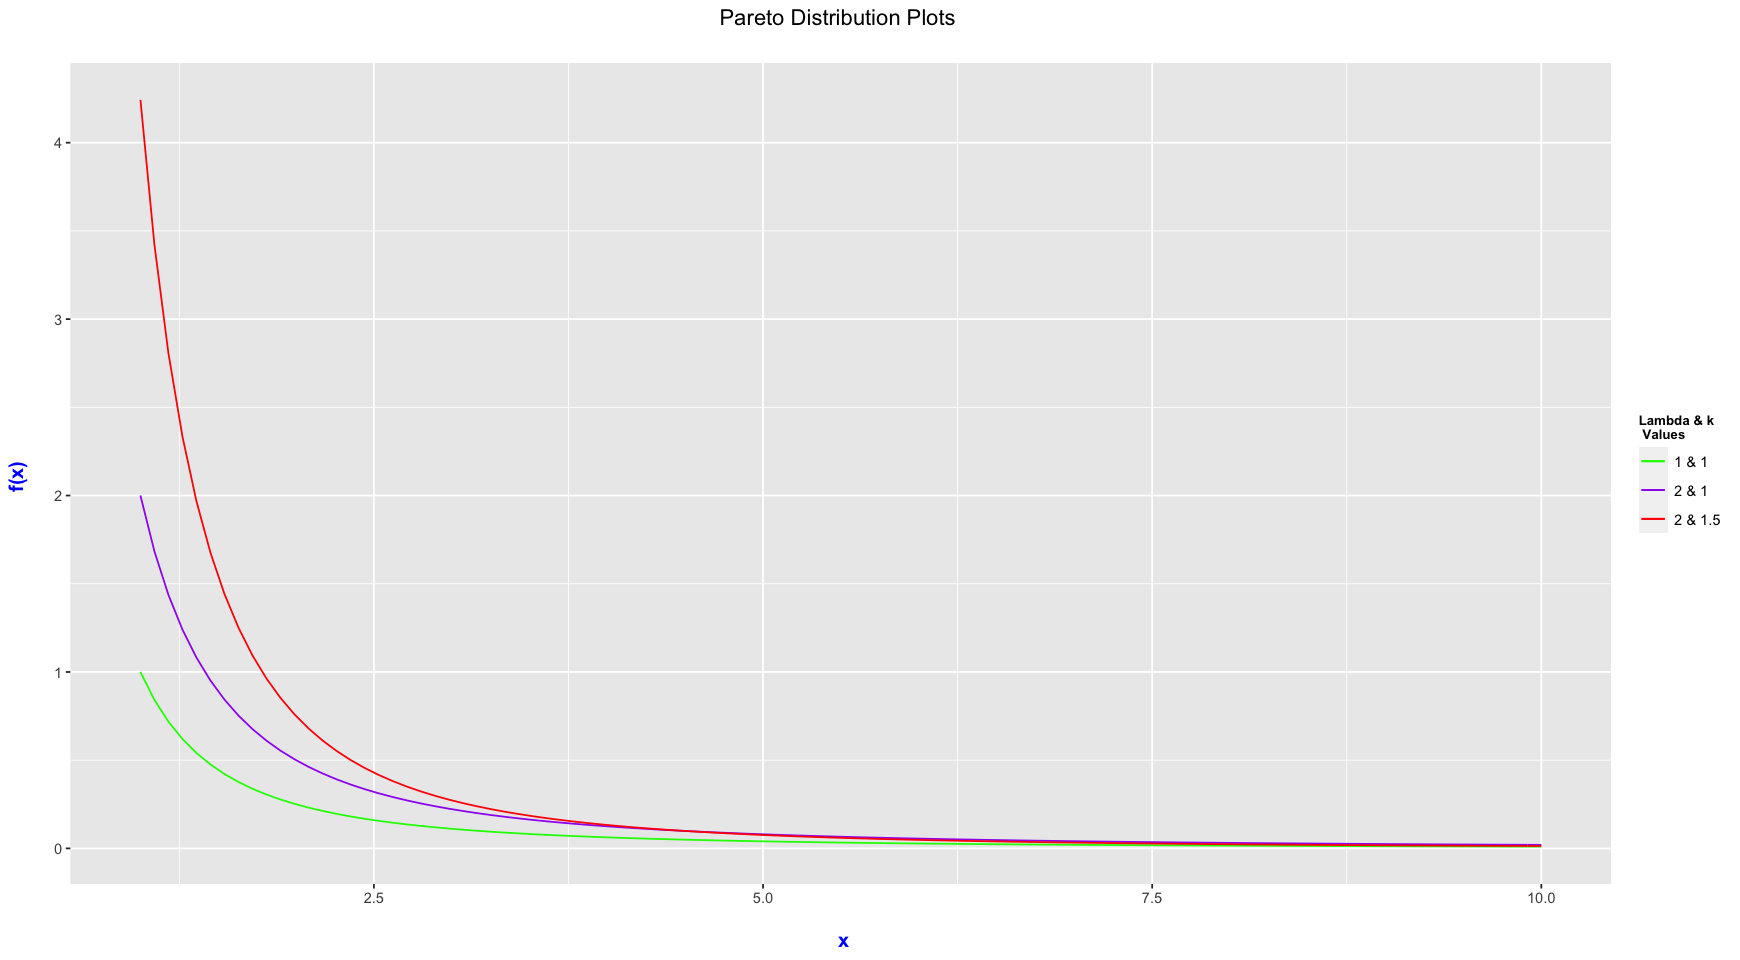

In [36]:
# Multiple Pareto Distributions:
# Pareto Density Function:
pareto_pdf <- function(x, lambda = 1, k = 1){
    density <- (k*(lambda^k)) / (x^(k + 1))
    return(density)
}

x_lower_pareto <- 1
x_upper_pareto <- 10
ggplot(data.frame(x = c(x_lower_pareto, x_upper_pareto)), aes(x = x)) + 
  xlim(c(x_lower_pareto, x_upper_pareto)) +
  stat_function(fun = pareto_pdf, args = list(lambda = 1, k = 1), aes(colour = "1 & 1")) + 
  stat_function(fun = pareto_pdf, args = list(lambda = 2, k = 1), aes(colour = "2 & 1")) + 
  stat_function(fun = pareto_pdf, args = list(lambda = 2, k = 1.5), aes(colour = "2 & 1.5")) + 
  scale_color_manual("Lambda & k \n Values", values = c("green", "purple", "red")) +
  labs(x = "\n x", y = "f(x) \n", 
       title = "Pareto Distribution Plots \n") + 
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="blue", size = 12),
        axis.title.y = element_text(face="bold", colour="blue", size = 12),
        legend.title = element_text(face="bold", size = 8),
        legend.position = "right")

# citaiton below for this

# Take away from `Pareto`:

`as you increase the slope (alpha or here 'k') you get a steep drop-off and scaling just moves to the right`

# <font color=red>LIKE</font>, Share & 

# <font color=red>SUB</font>scrbe

# Citations & Help:

# ◔̯◔

https://rafalab.github.io/dsbook/distributions.html

https://www.r-tutor.com/elementary-statistics/probability-distributions

https://cran.r-project.org/doc/contrib/Ricci-distributions-en.pdf

`Latex Help`

https://www.overleaf.com/learn/latex/List_of_Greek_letters_and_math_symbols

`Poisson`

https://towardsdatascience.com/the-poisson-distribution-and-poisson-process-explained-4e2cb17d459

https://online.stat.psu.edu/stat414/lesson/12/12.1

`Weibull`

https://rss.onlinelibrary.wiley.com/doi/pdf/10.1111/j.1740-9713.2018.01123.x

https://www.analyticsvidhya.com/blog/2015/05/comprehensive-guide-parametric-survival-analysis/

https://medium.com/utility-machine-learning/survival-analysis-part-1-the-weibull-model-5c2552c4356f

https://en.wikipedia.org/wiki/Weibull_distribution

https://blog.minitab.com/blog/understanding-statistics/why-the-weibull-distribution-is-always-welcome#:~:text=Weibull%20Distribution%20with%20Shape%20Between,of%20early%20wear%2Dout%20failures.

`Gamma`

https://www.itl.nist.gov/div898/handbook/eda/section3/eda366b.htm

https://online.stat.psu.edu/stat414/lesson/15/15.4

https://ocw.mit.edu/courses/mathematics/18-443-statistics-for-applications-fall-2006/lecture-notes/lecture6.pdf

`General Distribution Stuff`

https://medium.com/@srowen/common-probability-distributions-347e6b945ce4

https://onlinelibrary.wiley.com/doi/pdf/10.1002/9781119197096.app03

https://www.ohio.edu/plantbio/staff/mccarthy/quantmet/lectures/ttest.pdf

https://www.kdnuggets.com/2020/06/overview-data-distributions.html

`Student's T-test`

https://www.ruf.rice.edu/~bioslabs/tools/stats/ttest.html

https://www.statsandr.com/blog/student-s-t-test-in-r-and-by-hand-how-to-compare-two-groups-under-different-scenarios/

https://stattrek.com/probability-distributions/t-distribution.aspx

https://methodenlehre.github.io/SGSCLM-R-course/statistical-distributions.html

https://www.colby.edu/biology/BI17x/t_test.html

`Chi Square`

https://www.itl.nist.gov/div898/handbook/eda/section3/eda3666.htm

https://www.tutorialspoint.com/statistics/chi_squared_distribution.htm

https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223

https://stattrek.com/probability-distributions/chi-square.aspx

https://mathworld.wolfram.com/Chi-SquaredDistribution.html

https://rpubs.com/mpfoley73/460935 (plot)

`Logistic`

http://math.bme.hu/~nandori/Virtual_lab/stat/special/Logistic.pdf

https://towardsdatascience.com/an-introduction-to-logistic-regression-8136ad65da2e

https://datacriticism.com/2019/08/12/the-logistic-distribution-cdf-and-pdf-in-r/

`F distribution`

http://www.math.wm.edu/~leemis/chart/UDR/PDFs/F.pdf

http://jontalle.web.engr.illinois.edu/MISC/lme4/bw_anova_general.pdf

http://www.just.edu.jo/~haalshraideh/Courses/IE347/The%20F%20distribution.pdf

http://myweb.astate.edu/sbounds/Statistics_AP/4%20Week%204/ELAD_6773_WEEK_04_READING_01_IllowskyCh13ANOVA.pdf

https://courses.lumenlearning.com/introstats1/chapter/facts-about-the-f-distribution/

https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/f-test/

https://www.dummies.com/education/math/business-statistics/how-to-measure-the-moments-of-the-f-distribution/

`Pareto`

https://subversion.american.edu/aisaac/notes/pareto-distribution.pdf

https://www.statisticshowto.com/pareto-distribution/

https://mathworld.wolfram.com/ParetoDistribution.html

http://mtweb.cs.ucl.ac.uk/mus/arabidopsis/xiang/software/boost_1_47_0/libs/math/doc/sf_and_dist/html/math_toolkit/dist/dist_ref/dists/pareto.html

`plotting help`

https://stackoverflow.com/questions/42684993/how-to-plot-binomial-pdf-distributions-centered-on-same-mean

http://www.cookbook-r.com/Graphs/Plotting_distributions_(ggplot2)/

https://stackoverflow.com/questions/56005938/how-to-plot-multiple-poisson-distribution-in-one-plot

https://rpubs.com/mpfoley73/460943

https://stackoverflow.com/questions/21563864/ggplot2-overlay-density-plots-r

https://dk81.github.io/dkmathstats_site/rvisual-cont-prob-dists.html

https://bookdown.org/gabriel_butler/ECON41Labs/tutorial-5-the-poisson-distribution.html